In [18]:
from astropy.table import Table
from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import importlib
from astropy.wcs import WCS
from scipy import interpolate
import pandas as pd
import sympy as syp
from astropy import units as u
import radio_beam
from astropy.table import Table
from radio_beam import Beam
from astropy import coordinates
from astropy import wcs
from astropy.nddata.utils import Cutout2D
from dendrocat.aperture import Ellipse
from astropy.io import ascii
import astropy.constants as c

from functools import reduce
from itertools import chain
import Paths.Paths as paths

Path = paths.filepaths()

W51 = '/orange/adamginsburg/w51/TaehwaYoo/'
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'

#---------- high res B6 (before conv) ------------
w51e2_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e2_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e2_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e2_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural =  W51cont+'W51n_cont_bignatural.image.fits'

#---------- high res B3 (before conv) ------------

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b3_tt1 = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51n_b3_alpha = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv = w51conv + 'w51n_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt1 = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51e2_b3_alpha = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51e2_b6_conv = w51conv + 'w51e2_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B6_conv.fits'
w51e_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B3_conv.fits'


w51n_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B3_conv.fits'

w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'

w51n_b6_conv_briggs = w51conv + 'w51n_briggs_B6_conv.fits'
w51n_b6_conv_robust0 = w51conv + 'w51n_robust0_B6_conv.fits'
w51n_b6_conv_superuniform = w51conv + 'w51n_superuniform_B6_conv.fits'

w51e_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51e2.spw0thru19.14500.robust0.thr0.15mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51n.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51e_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51e_matched.fits'
w51n_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51n_matched.fits'

#catalogdir = '/Users/dbahck37/w51data/alma_imf/catalog/getsf-native/'
catalogdir = '/orange/adamginsburg/ALMA_IMF/catalogs/getsf-smoothed/'
corecat_w51e = catalogdir + 'W51-E-getsf.cat'
corecat_w51n = catalogdir + 'W51-IRS2-getsf.cat'


w51n_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'
w51e_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51e2.spw0thru19.14500.robust0.thr0.15mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51n.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
#---------- local direc  ------------

"""

w51n_b3_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'



w51e_b3_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'


w51n_b6_conv_briggs = '/Users/dbahck37/w51data/convolved_new/w51n_briggs_B6_conv.fits'
w51n_b3_tt0 = '/Users/dbahck37/w51data/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51e_b3_tt0 = '/Users/dbahck37/W51data/w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51e_b6_conv_briggs ='/Users/dbahck37/W51data/convolved_new/w51e_briggs_B6_conv.fits'
"""

w51e_almaimf_coretemp = '/home/t.yoo/W51-E_core_temperature_smooth_catalog.dat'
w51n_almaimf_coretemp = '/home/t.yoo/W51-IRS2_core_temperature_smooth_catalog.dat'


class core_catdata():
    def __init__(self,catfile,band='B3'):
        catdata_w51e = ascii.read(catfile,data_start=0,format='commented_header', header_start=120,  comment="!")
        self.sky_ra = catdata_w51e['WCS_ACOOR']
        self.sky_dec = catdata_w51e['WCS_DCOOR']
        self.pix_x = catdata_w51e['XCO_P']
        self.pix_y = catdata_w51e['YCO_P']
        
        if band=='B3':
            bandind = 3
        else:
            bandind = 2

        self.afwhm = catdata_w51e['AFWHM0%d'%bandind] #arcsec
        self.bfwhm = catdata_w51e['BFWHM0%d'%bandind]

        self.asize = catdata_w51e['ASIZE0%d'%bandind]
        self.bsize = catdata_w51e['BSIZE0%d'%bandind]

        self.theta = catdata_w51e['THETA0%d'%bandind]
        
        self.flux = catdata_w51e['FXT_BST0%d'%bandind]
        self.fluxerr = catdata_w51e['FXT_ERR0%d'%bandind]
        self.flux_g = catdata_w51e['FXT_ALT0%d'%bandind]

        self.fooa = catdata_w51e['FOOA0%d'%bandind]
        self.foob = catdata_w51e['FOOB0%d'%bandind]
        
        self.int_peak = catdata_w51e['FXP_BST0%d'%bandind]
        self.interr_peak = catdata_w51e['FXP_ERR0%d'%bandind]
        
        self.size = (catdata_w51e['AFWHM0%d'%bandind]*catdata_w51e['BFWHM0%d'%bandind]**2)**(1/3)


        self.no = catdata_w51e['NO']

        self.rec_ind_b3 = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15))[0]

        self.rec_ind_b6 = np.where((np.abs(catdata_w51e['GOODM02'])>1)&
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]
        self.rec_ind = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15) &
                           (np.abs(catdata_w51e['GOODM02'])>1) &
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]
        
        rescaled_3mmflux = catdata_w51e['FXT_BST03'] * catdata_w51e['AFWHM02']/catdata_w51e['AFWHM03']
        gamma = np.log10(catdata_w51e['FXT_BST02'] / rescaled_3mmflux)/np.log10(228.918/101.426)
        self.woffind = np.where(gamma>2)[0]
        self.wffind = np.where(gamma<2)[0]

        
    def get_temperature(self,tempfile,threshold=1e-4):
        tab = ascii.read(tempfile, data_start=4)
        ra = tab['col2']
        dec = tab['col3']
        temp = tab['col4']

        temparr = []
        for i in range(len(ra)):
            dist = np.sqrt((ra[i]-self.sky_ra)**2+(dec[i]-self.sky_dec)**2)
            mindist = np.min(dist)
            if mindist<threshold:
                index = np.argmin(dist)
                temparr.append(temp[index])
            else:
                temparr.append(np.nan)
        self.temp = np.array(temparr)*u.K
        return np.array(temparr)
    
    def get_coremass(self,freq, kappa, dist):
       
        mass = - 1 / kappa * dist**2 * self.flux  / self.int_peak * np.log(1 - (self.int_peak *u.Jy  / BB(freq,self.temp)).to(u.cm/u.cm).value)
        self.mass = mass.to(u.Msun)
        return mass.to(u.Msun)
    
    def get_coremasserr(self,freq, kappa, dist,):
        
        masserr = np.abs(self.mass * np.sqrt((self.fluxerr/self.flux)**2+(self.interr_peak/self.int_peak)**2))
        return masserr.to(u.Msun)   
    
    
        
        
    

                
            
def BB(freq, temp):
    B_nu = (2 * freq**3 *c.h / (c.c**2) * 1 / (np.e**(c.h*freq/(c.k_B*temp))-1))
    return B_nu        

def kappa(nu, nu0=271.1*u.GHz, kappa0=0.0114*u.cm**2*u.g**-1, beta=1.75):
    """
    Compute the opacity $\kappa$ given a reference frequency (or wavelength)
    and a power law governing the opacity as a fuction of frequency:
    $$ \kappa = \kappa_0 \left(\\frac{\\nu}{\\nu_0}\\right)^{\\beta} $$
    The default kappa=0.0114 at 271.1 GHz comes from extrapolating the
    Ossenkopf & Henning 1994 opacities for the thin-ice-mantle, 10^6 year model
    anchored at 1.0 mm with an assumed beta of 1.75.
    Parameters
    ----------
    nu: astropy.Quantity [u.spectral() equivalent]
        The frequency at which to evaluate kappa
    nu0: astropy.Quantity [u.spectral() equivalent]
        The reference frequency at which $\kappa$ is defined
    kappa0: astropy.Quantity [cm^2/g]
        The dust opacity per gram of H2 along the line of sight.  Because of
        the H2 conversion, this factor implicitly includes a dust to gas ratio
        (usually assumed 100)
    beta: float
        The power-law index governing kappa as a function of nu
    """
    return (kappa0*(nu.to(u.GHz,u.spectral())/nu0.to(u.GHz,u.spectral()))**(beta)).to(u.cm**2/u.g)        

     

def get_BEmass(major, minor, temp ):
    rad = (major * minor**2)**(1/3)
    sigma_th = np.sqrt(c.k_B*temp*u.K/(2.4*c.m_p))
    return (2.4*rad*u.au*sigma_th**2/c.G).to(u.Msun)

def get_Jeansmass(temp, mass, major, minor):
    rad = (major * minor**2)**(1/3)
    rho = mass*(u.Msun) / (4/3*np.pi * (rad*u.au)**3)
    c_s = np.sqrt(c.k_B*temp*u.K/2.8/c.m_p)
    jeans_mass = np.pi**(5/2)/6/c.G**(3/2) * c_s.to(u.cm/u.s)**3 * rho.to(u.g/u.cm**3)**(-1/2)
    return jeans_mass.to(u.Msun)
def count_points_in_ellipse(xcen,ycen,major,minor,pa,xpos,ypos):
    # caclulate foci positions 
    # must be full major, minor not semi major, minor
    fodx = np.cos(pa)*np.sqrt((major/2)**2-(minor/2)**2)
    fody = np.sin(pa)*np.sqrt((major/2)**2-(minor/2)**2)
    
    fox1 = xcen + fodx
    foy1 = ycen + fody
    
    fox2 = xcen - fodx
    foy2 = ycen - fody
    
    dist1 = np.sqrt((xpos-fox1)**2+(ypos-foy1)**2)
    dist2 = np.sqrt((xpos-fox2)**2+(ypos-foy2)**2)
    
    isinside = np.where(dist1+dist2<major)[0]
    
    return len(isinside), list(isinside)

class multiplicity():
    def __init__(self, hdrhr,core_catdatadir,xysource,isb3=True,beam=None,use_criteria='b6',issky=True, label=None,
                 aperture='fwhm+beam',limitarea=None,  maxrad=1e3, verbose=False):
    
        catdata = ascii.read(core_catdatadir,data_start=0,format='commented_header', header_start=120,  comment="!")
        sky_ra = catdata['WCS_ACOOR']
        sky_dec = catdata['WCS_DCOOR']
        no = catdata['NO']
        if isb3:
            bandlabel = '03'
        else:
            bandlabel = '02'
        fooa = catdata['FOOA%s'%bandlabel]
        foob = catdata['FOOB%s'%bandlabel]
        theta = catdata['THETA%s'%bandlabel]
        afwhm = catdata['AFWHM%s'%bandlabel]
        bfwhm = catdata['BFWHM%s'%bandlabel]

        ncat = len(no)
        
        coreidx = np.arange(ncat)

        if use_criteria == 'b6':
            rec_ind = np.where((np.abs(catdata['GOODM02'])>1)&
                       (np.abs(catdata['SIGNM02'])>1)&
                       (catdata['FXP_BST02']/catdata['FXP_ERR02']>2)&
                       (catdata['FXT_BST02']/catdata['FXT_ERR02']>2)&
                       (catdata['AFWHM02']/catdata['BFWHM02']<2)&
                       (catdata['FOOA02']/catdata['AFWHM02']>1.15))[0]
        elif use_criteria == 'b3':
            rec_ind = np.where((np.abs(catdata['GOODM03'])>1)&
                       (np.abs(catdata['SIGNM03'])>1)&
                       (catdata['FXP_BST03']/catdata['FXP_ERR03']>2)&
                       (catdata['FXT_BST03']/catdata['FXT_ERR03']>2)&
                       (catdata['AFWHM03']/catdata['BFWHM03']<2)&
                       (catdata['FOOA03']/catdata['AFWHM03']>1.15))[0]
        elif use_criteria == 'both': 
            rec_ind = np.where((np.abs(catdata['GOODM03'])>1)&
                               (np.abs(catdata['SIGNM03'])>1)&
                               (catdata['FXP_BST03']/catdata['FXP_ERR03']>2)&
                               (catdata['FXT_BST03']/catdata['FXT_ERR03']>2)&
                               (catdata['AFWHM03']/catdata['BFWHM03']<2)&
                               (catdata['FOOA03']/catdata['AFWHM03']>1.15) &
                               (np.abs(catdata['GOODM02'])>1) &
                               (np.abs(catdata['SIGNM02'])>1)&
                               (catdata['FXP_BST02']/catdata['FXP_ERR02']>2)&
                               (catdata['FXT_BST02']/catdata['FXT_ERR02']>2)&
                               (catdata['AFWHM02']/catdata['BFWHM02']<2)&
                               (catdata['FOOA02']/catdata['AFWHM02']>1.15))[0]

        else:
            rec_ind = np.arange(ncat)

        if limitarea is not None:
            posind = np.where((sky_ra>limitarea[0])&(sky_ra<limitarea[1])&
                              (sky_dec>limitarea[2])&(sky_dec<limitarea[3]))[0]
        else:
            posind = np.arange(ncat)
        if label is None:
            label=np.arange(ncat)

        totalind = reduce(np.intersect1d, (rec_ind,  posind, label))  

        sky_ra = sky_ra[totalind]
        sky_dec = sky_dec[totalind]
        fooa = fooa[totalind]
        foob = foob[totalind]
        theta = theta[totalind]
        no = no[totalind]
        afwhm =afwhm[totalind]
        bfwhm = bfwhm[totalind]
        coreidx = coreidx[totalind]

        skypos = np.vstack((sky_ra,sky_dec)).T


        wcsNB = WCS(hdrhr,naxis=2)
        scaleNB = wcsNB.proj_plane_pixel_scales()[0]
        beamNB = Beam.from_fits_header(hdrhr)

        xypos_core = wcsNB.wcs_world2pix(skypos,0)
        xpos_core = xypos_core[:,0]
        ypos_core = xypos_core[:,1]

        if issky:
            xysource_pix = wcsNB.wcs_world2pix(xysource,0)
        else:
            xysource_pix = xysource
        ysonumarr=[] ; coreindarr=[]; ysoindarr=[]
        #print(xysource)
        for i in range(len(xypos_core)):
            if aperture is 'footprint':
                major = fooa[i]/3600/scaleNB.value
                minor = foob[i]/3600/scaleNB.value
                pa = theta[i]+90
            elif aperture is 'fwhm+beam':
                meanbeamsize = (beam.major.value+beam.minor.value)/4
                major = (afwhm[i]/3600+meanbeamsize)/scaleNB.value
                minor = (bfwhm[i]/3600+meanbeamsize)/scaleNB.value
                pa = theta[i]+90
            elif aperture is 'beam':
                major = beam.major.value/scaleNB.value
                minor = beam.minor.value/scaleNB.value
                pa = beam.pa.value+90
            if major > maxrad:
                continue

            numsource, indsource = count_points_in_ellipse(xpos_core[i],ypos_core[i],major,minor,pa,xysource_pix[:,0],xysource_pix[:,1])
            if verbose:
                print(coreidx[i], indsource)
            ysonumarr.append(numsource)
            coreindarr.append(coreidx[i])
            ysoindarr.append(indsource)
            
      
        ysoindarr_flat = []
        for arr in ysoindarr:
            ysoindarr_flat.extend(arr)
       
        print('cores with/without YSOs ', len(np.where(np.array(ysonumarr)!=0)[0]), len(xpos_core)-len(np.where(np.array(ysonumarr)!=0)[0]))
        print('YSOs associated with cores',len(np.unique(ysoindarr_flat)),' out of ',len(xysource_pix[:,0]))
              
        self.ysonumarr = ysonumarr
        self.coreindarr = coreindarr
        self.ysoindarr = ysoindarr
        
   
    


def exist_inside_FOV(xcore_sky, ycore_sky, yso_image, hrhdr):
    isfinite = np.where(np.isfinite(yso_image))
    xfinite1 = np.min(isfinite[0])
    xfinite2 = np.max(isfinite[0])
    yfinite1 = np.min(isfinite[1])
    yfinite2 = np.max(isfinite[1])
    
    xcen = (xfinite1 + xfinite2)/2
    ycen = (yfinite1 + yfinite2)/2

    wcs_hr = WCS(hrhdr,naxis=2)
    xypos = wcs_hr.wcs_world2pix(np.vstack((xcore_sky,ycore_sky)).T,0)
    
    rad = np.abs(xfinite2 - xcen)
    
    
    dist = np.sqrt((xypos[:,0]- xcen)**2+(xypos[:,1]-ycen)**2)
    isinside = np.where(dist<rad)[0]
    
    return isinside
     

In [19]:
freqb3=92982346121.91989*u.Hz
freqb6=226691598706.70853*u.Hz
kappa_b3 = kappa(freqb3)
kappa_b6 = kappa(freqb6)
core_catdata_w51e_b3 = core_catdata(corecat_w51e)
core_sky_ra_w51e_b3 = core_catdata_w51e_b3.sky_ra
core_sky_dec_w51e_b3 = core_catdata_w51e_b3.sky_dec
core_flux_w51e_b3 = core_catdata_w51e_b3.flux
core_fluxerr_w51e_b3 = core_catdata_w51e_b3.fluxerr
core_size_w51e_b3 = core_catdata_w51e_b3.size * 5410 #arcsec * pc -> au

core_catdata_w51e_b6 = core_catdata(corecat_w51e, band='B6')
core_sky_ra_w51e_b6 = core_catdata_w51e_b6.sky_ra
core_sky_dec_w51e_b6 = core_catdata_w51e_b6.sky_dec
core_flux_w51e_b6 = core_catdata_w51e_b6.flux
core_fluxerr_w51e_b6 = core_catdata_w51e_b6.fluxerr
core_size_w51e_b6 = core_catdata_w51e_b6.size * 5410 #arcsec * pc -> au


core_catdata_w51n_b3 = core_catdata(corecat_w51n)
core_sky_ra_w51n_b3 = core_catdata_w51n_b3.sky_ra
core_sky_dec_w51n_b3 = core_catdata_w51n_b3.sky_dec
core_flux_w51n_b3 = core_catdata_w51n_b3.flux
core_fluxerr_w51n_b3 = core_catdata_w51n_b3.fluxerr
core_size_w51n_b3 = core_catdata_w51n_b3.size * 5100 #arcsec * pc -> au


core_catdata_w51n_b6 = core_catdata(corecat_w51n, band='B6')
core_sky_ra_w51n_b6 = core_catdata_w51n_b6.sky_ra
core_sky_dec_w51n_b6 = core_catdata_w51n_b6.sky_dec
core_flux_w51n_b6 = core_catdata_w51n_b6.flux
core_fluxerr_w51n_b6 = core_catdata_w51n_b6.fluxerr
core_size_w51n_b6 = core_catdata_w51n_b6.size * 5100 #arcsec * pc -> au

coretemp_w51e = core_catdata_w51e_b6.get_temperature(w51e_almaimf_coretemp)
coretemp_w51n = core_catdata_w51n_b6.get_temperature(w51n_almaimf_coretemp)
coremass_w51e = core_catdata_w51e_b6.get_coremass(freqb6, kappa_b6, 5.41*u.kpc)
coremass_w51n = core_catdata_w51n_b6.get_coremass(freqb6, kappa_b6, 5.1*u.kpc)
coremasserr_w51e = core_catdata_w51e_b6.get_coremasserr(freqb6, kappa_b6, 5.41*u.kpc)
coremasserr_w51n = core_catdata_w51n_b6.get_coremasserr(freqb6, kappa_b6, 5.1*u.kpc)


fitsdata_b3 = fits.open(w51e_b3_tt0)
image_b3_w51e = fitsdata_b3[0].data
if len(image_b3_w51e.shape)>2:
    image_b3_w51e = fitsdata_b3[0].data[0][0]
hdrB3_w51e_hr = fits.getheader(w51e_b3_tt0)  
    
fitsdata_b3 = fits.open(w51n_b3_tt0)
image_b3_w51n = fitsdata_b3[0].data
if len(image_b3_w51n.shape)>2:
    image_b3_w51n = fitsdata_b3[0].data[0][0]
hdrB3_w51n_hr = fits.getheader(w51n_b3_tt0)  

fitsdata_b6 = fits.open(w51e_b6_calibrated_pbcor)
image_b6_w51e = fitsdata_b6[0].data
if len(image_b6_w51e.shape)>2:
    image_b6_w51e = fitsdata_b6[0].data[0][0]
hdrB6_w51e_hr = fits.getheader(w51e_b6_calibrated_pbcor)  
    
fitsdata_b6 = fits.open(w51n_b6_calibrated_pbcor)
image_b6_w51n = fitsdata_b6[0].data
if len(image_b6_w51n.shape)>2:
    image_b6_w51n = fitsdata_b6[0].data[0][0]
hdrB6_w51n_hr = fits.getheader(w51n_b6_calibrated_pbcor)  

hdrB6_w51e_almaimf = fits.getheader(w51e_b6_almaimf)  
wcsB6_w51e_almaimf = WCS(hdrB6_w51e_almaimf,naxis=2)
beamb6_w51e_almaimf = Beam.from_fits_header(hdrB6_w51e_almaimf)  

hdrB3_w51e_almaimf = fits.getheader(w51e_b3_almaimf)  
wcsB3_w51e_almaimf = WCS(hdrB3_w51e_almaimf,naxis=2)
beamb3_w51e_almaimf = Beam.from_fits_header(hdrB3_w51e_almaimf) 

hdrB6_w51n_almaimf = fits.getheader(w51n_b6_almaimf)  
wcsB6_w51n_almaimf = WCS(hdrB6_w51n_almaimf,naxis=2)
beamb6_w51n_almaimf = Beam.from_fits_header(hdrB6_w51n_almaimf)  

hdrB3_w51n_almaimf = fits.getheader(w51n_b3_almaimf)  
wcsB3_w51n_almaimf = WCS(hdrB3_w51n_almaimf,naxis=2)
beamb3_w51n_almaimf = Beam.from_fits_header(hdrB3_w51n_almaimf)  

catalog_w51e_yso = Table.read(w51e_matched_catalog ,format='fits')
yso_w51e_xsky_b6 = catalog_w51e_yso['b6_xsky'] ; yso_w51e_ysky_b6 = catalog_w51e_yso['b6_ysky']
yso_w51e_xsky_b3 = catalog_w51e_yso['b3_xsky'] ; yso_w51e_ysky_b3 = catalog_w51e_yso['b3_ysky']

yso_detect_w51e_b6 = np.where(yso_w51e_xsky_b6>0)[0]
yso_detect_w51e_b3 = np.where(yso_w51e_xsky_b3>0)[0]


catalog_w51n_yso = Table.read(w51n_matched_catalog ,format='fits')
yso_w51n_xsky_b6 = catalog_w51n_yso['b6_xsky'] ; yso_w51n_ysky_b6 = catalog_w51n_yso['b6_ysky']
yso_w51n_xsky_b3 = catalog_w51n_yso['b3_xsky'] ; yso_w51n_ysky_b3 = catalog_w51n_yso['b3_ysky']

yso_xsky_w51e = []
for i,x in enumerate(yso_w51e_xsky_b6):
    if x > 0:
        yso_xsky_w51e.append(x)
    else:
        yso_xsky_w51e.append(yso_w51e_xsky_b3[i])
yso_ysky_w51e = []
for i,x in enumerate(yso_w51e_ysky_b6):
    if x > 0:
        yso_ysky_w51e.append(x)
    else:
        yso_ysky_w51e.append(yso_w51e_ysky_b3[i])

yso_xsky_w51n = []
for i,x in enumerate(yso_w51n_xsky_b6):
    if x > 0:
        yso_xsky_w51n.append(x)
    else:
        yso_xsky_w51n.append(yso_w51n_xsky_b3[i])
yso_ysky_w51n = []
for i,x in enumerate(yso_w51n_ysky_b6):
    if x > 0:
        yso_ysky_w51n.append(x)
    else:
        yso_ysky_w51n.append(yso_w51n_ysky_b3[i])

#whether the core is inside the FOV
isinside_w51e_b3 = exist_inside_FOV(core_sky_ra_w51e_b6, core_sky_dec_w51e_b6, image_b3_w51e, hdrB3_w51e_hr) 
isinside_w51e_b6 = exist_inside_FOV(core_sky_ra_w51e_b6, core_sky_dec_w51e_b6, image_b6_w51e, hdrB6_w51e_hr)
isinside_w51n_b3 = exist_inside_FOV(core_sky_ra_w51n_b6, core_sky_dec_w51n_b6, image_b3_w51n, hdrB3_w51n_hr)
isinside_w51n_b6 = exist_inside_FOV(core_sky_ra_w51n_b6, core_sky_dec_w51n_b6, image_b6_w51n, hdrB6_w51n_hr)


isinside_w51e_b3_woff = np.intersect1d(isinside_w51e_b3,  core_catdata_w51e_b3.woffind)
isinside_w51n_b3_woff = np.intersect1d(isinside_w51n_b3,  core_catdata_w51n_b3.woffind)
isinside_w51e_b6_woff = np.intersect1d(isinside_w51e_b6,  core_catdata_w51e_b6.woffind)
isinside_w51n_b6_woff = np.intersect1d(isinside_w51n_b6,  core_catdata_w51n_b6.woffind)


isinside_w51e_b3_wff = np.intersect1d(isinside_w51e_b3,  core_catdata_w51e_b3.wffind)
isinside_w51n_b3_wff = np.intersect1d(isinside_w51n_b3,  core_catdata_w51n_b3.wffind)
isinside_w51e_b6_wff = np.intersect1d(isinside_w51e_b6,  core_catdata_w51e_b6.wffind)
isinside_w51n_b6_wff = np.intersect1d(isinside_w51n_b6,  core_catdata_w51n_b6.wffind)


yso_xysource_w51e= np.vstack((yso_xsky_w51e, yso_ysky_w51e)).T
yso_xysource_w51n= np.vstack((yso_xsky_w51n, yso_ysky_w51n)).T

hdrhr_w51n_b3= fits.getheader(w51n_b3_tt0) 
hdrhr_w51e_b3= fits.getheader(w51e_b3_tt0) 



multiplicity_w51e = multiplicity(hdrhr_w51e_b3,corecat_w51e,yso_xysource_w51e,isb3=False,
                                 beam = beamb6_w51e_almaimf,
                                 use_criteria='b6',
                                 label=isinside_w51e_b3)
multiplicity_w51n = multiplicity(hdrhr_w51n_b3,corecat_w51n,yso_xysource_w51n,isb3=False,
                                 beam = beamb6_w51n_almaimf,
                                 use_criteria='b6',
                                label=isinside_w51n_b3)

multiplicity_w51e_woff = multiplicity(hdrhr_w51e_b3,corecat_w51e,yso_xysource_w51e,isb3=False,
                                 beam = beamb6_w51e_almaimf,
                                 use_criteria='b6',
                                 label=isinside_w51e_b3_woff)
multiplicity_w51n_woff = multiplicity(hdrhr_w51n_b3,corecat_w51n,yso_xysource_w51n,isb3=False,
                                 beam = beamb6_w51n_almaimf,
                                 use_criteria='b6',
                                label=isinside_w51n_b3_woff)

multiplicity_w51e_wff = multiplicity(hdrhr_w51e_b3,corecat_w51e,yso_xysource_w51e,isb3=False,
                                 beam = beamb6_w51e_almaimf,
                                 use_criteria='b6',
                                 label=isinside_w51e_b3_wff)
multiplicity_w51n_wff = multiplicity(hdrhr_w51n_b3,corecat_w51n,yso_xysource_w51n,isb3=False,
                                 beam = beamb6_w51n_almaimf,
                                 use_criteria='b6',
                                label=isinside_w51n_b3_wff)

multiplicity_w51e_b3 = multiplicity(hdrhr_w51e_b3,corecat_w51e,yso_xysource_w51e,isb3=False,
                                 beam = beamb6_w51e_almaimf,
                                 use_criteria='both',
                                   label=isinside_w51e_b3)
multiplicity_w51n_b3 =  multiplicity(hdrhr_w51n_b3,corecat_w51n,yso_xysource_w51n,isb3=False,
                                 beam= beamb6_w51n_almaimf, 
                                 use_criteria='both',
                                    label=isinside_w51n_b3)

multiplicity_w51e_woff_b3 = multiplicity(hdrhr_w51e_b3,corecat_w51e,yso_xysource_w51e,isb3=False,
                                 beam = beamb6_w51e_almaimf,
                                 use_criteria='both',
                                 label=isinside_w51e_b3_woff, verbose=True)
multiplicity_w51n_woff_b3 = multiplicity(hdrhr_w51n_b3,corecat_w51n,yso_xysource_w51n,isb3=False,
                                 beam = beamb6_w51n_almaimf,
                                 use_criteria='both',
                                label=isinside_w51n_b3_woff, verbose=True)

multiplicity_w51e_wff_b3 = multiplicity(hdrhr_w51e_b3,corecat_w51e,yso_xysource_w51e,isb3=False,
                                 beam = beamb6_w51e_almaimf,
                                 use_criteria='both',
                                 label=isinside_w51e_b3_wff)
multiplicity_w51n_wff_b3 = multiplicity(hdrhr_w51n_b3,corecat_w51n,yso_xysource_w51n,isb3=False,
                                 beam = beamb6_w51n_almaimf,
                                 use_criteria='both',
                                label=isinside_w51n_b3_wff)
print(coremass_w51e)

print(coremass_w51n)


cores with/without YSOs  21 6
YSOs associated with cores 53  out of  137
cores with/without YSOs  38 53
YSOs associated with cores 57  out of  74
cores with/without YSOs  16 2
YSOs associated with cores 45  out of  137
cores with/without YSOs  28 29
YSOs associated with cores 41  out of  74
cores with/without YSOs  4 3
YSOs associated with cores 7  out of  137
cores with/without YSOs  5 11
YSOs associated with cores 11  out of  74
cores with/without YSOs  13 1
YSOs associated with cores 39  out of  137
cores with/without YSOs  15 7
YSOs associated with cores 32  out of  74
1 [40]
3 [29, 30, 31, 32, 33, 34]
4 [46, 48, 50, 51, 54, 56]
7 [52, 55, 58, 59, 60, 61]
11 [37, 102]
12 [1, 2, 3, 83]
13 [53, 57]
16 [70, 71, 82, 123]
18 [65]
27 [35]
cores with/without YSOs  10 0
YSOs associated with cores 33  out of  137
0 [10, 11, 13, 24]
1 [9]
3 [44, 45]
5 [19, 20, 30, 31]
7 [66]
8 [42]
9 [48, 49]
10 []
11 [65]
13 [33, 34]
14 [36, 37, 38]
16 []
18 [67]
28 [41]
cores with/without YSOs  12 2
YSOs a

[ 6 11  3  0  3  0  4  0  0  0] [53 29  3  3  2  1  0  0  0  0]
[2 7 3 0 2 0 4 0 0 0] [29 21  3  2  2  0  0  0  0  0]


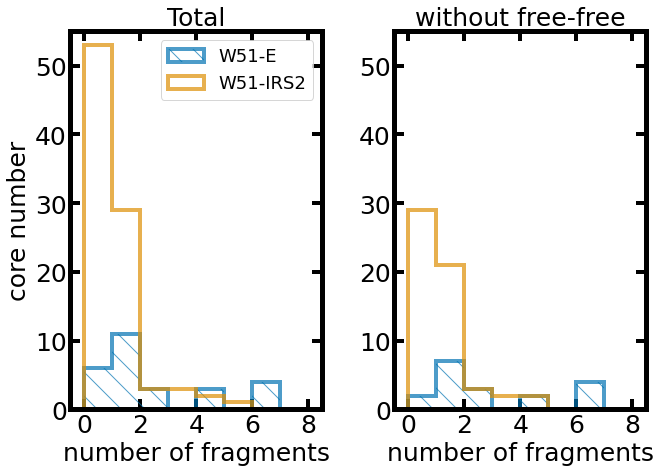

In [20]:
import seaborn as sns
import matplotlib as mpl
plt.rcParams['axes.labelsize']=25
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.rcParams['axes.titlesize']=25
mpl.rcParams['axes.linewidth'] = 5
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 2
params = {"xtick.top": True, "ytick.right": True, "xtick.direction": "in", "ytick.direction": "in"}
plt.rcParams.update(params)
bins = np.arange(11)


numarr_w51e = multiplicity_w51e.ysonumarr
numarr_w51n = multiplicity_w51n.ysonumarr
numarr_w51e_woff = multiplicity_w51e_woff.ysonumarr
numarr_w51n_woff = multiplicity_w51n_woff.ysonumarr

cmap = sns.color_palette("colorblind")

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_axes([0.1,0.17,0.35,0.75])
ax2 = fig.add_axes([0.55,0.17,0.35,0.75])

#ax1.hist(numarr_w51e_b3fov, bins = bins, facecolor='none',edgecolor='b', histtype='step',label='W51-E',lw=4,alpha=0.8)
#ax1.hist(numarr_w51n_b3fov, bins = bins, facecolor='none',edgecolor='orange', histtype='step',label='W51-IRS2',lw=4,alpha=0.8)
ax1.hist(numarr_w51e, bins=bins, alpha=0.7, color=cmap[0], label='W51-E',lw=4, histtype='step',hatch='\\')
ax1.hist(numarr_w51n, bins=bins, alpha=0.7, color=cmap[1], label='W51-IRS2',lw=4, histtype='step')
ax2.hist(numarr_w51e_woff, bins=bins, alpha=0.7, color=cmap[0], label='W51-E',lw=4, histtype='step',hatch='\\')
ax2.hist(numarr_w51n_woff, bins=bins, alpha=0.7, color=cmap[1], label='W51-IRS2',lw=4, histtype='step')
print(np.histogram(numarr_w51e,bins=bins)[0],np.histogram(numarr_w51n,bins=bins)[0])
print(np.histogram(numarr_w51e_woff,bins=bins)[0],np.histogram(numarr_w51n_woff,bins=bins)[0])

ax1.set_xlabel('number of fragments')
ax2.set_xlabel('number of fragments')

ax1.set_ylabel('core number')
ax1.set_title('Total')
ax2.set_title('without free-free')
ax1.legend(fontsize=18)
ax1.set_ylim(0,55)
ax2.set_ylim(0,55)
ax1.set_xlim(-0.5,8.5)
ax2.set_xlim(-0.5,8.5)
ax1.set_xticks([0,2,4,6,8])
ax2.set_xticks([0,2,4,6,8])

plt.savefig('frag_count.pdf')





[1.]
[10.77375448  7.22062725  5.65058911  3.63824764  1.31140099  1.        ]
[12.66453799  8.30763807  6.95377414  4.43559963  3.40564209  1.        ]
[4.28997393 3.45460408 2.49553739 2.33919313 1.53680347 1.        ]
[2.71326887 1.        ]
[1.81579293 1.33962497 1.03471234 1.        ]
[3.10242956 1.        ]
[1.3927655 1.       ]
[11.14073575  7.40384293  7.34702119  5.3065936   4.25688901  1.        ]
[1.]
[1.]
16
[1.]
[18.47663695 17.65243145  7.75180019  6.74957141  3.80174973  1.        ]
[12.11066203  8.2612649   7.74993407  6.05507219  2.95440846  1.        ]
[4.56576753 3.69275154 3.13852864 2.23557177 1.22770747 1.        ]
[1.94789829 1.        ]
[2.03771775 1.57325497 1.1220294  1.        ]
[1.]
[1.]
10
[1.]
[1.82813544 1.54824134 1.02514939 1.        ]
[4.46245878 3.67195281 1.        ]
[1.]
[1.]
28
[19.15763937 17.99574614  9.15112889  1.        ]
[1.]
[1.28942252 1.        ]
[1.]
[1.]
[3.64449334 1.        ]
[1.]
[6.75038608 1.        ]
[3.07785505 1.2867586  1.      

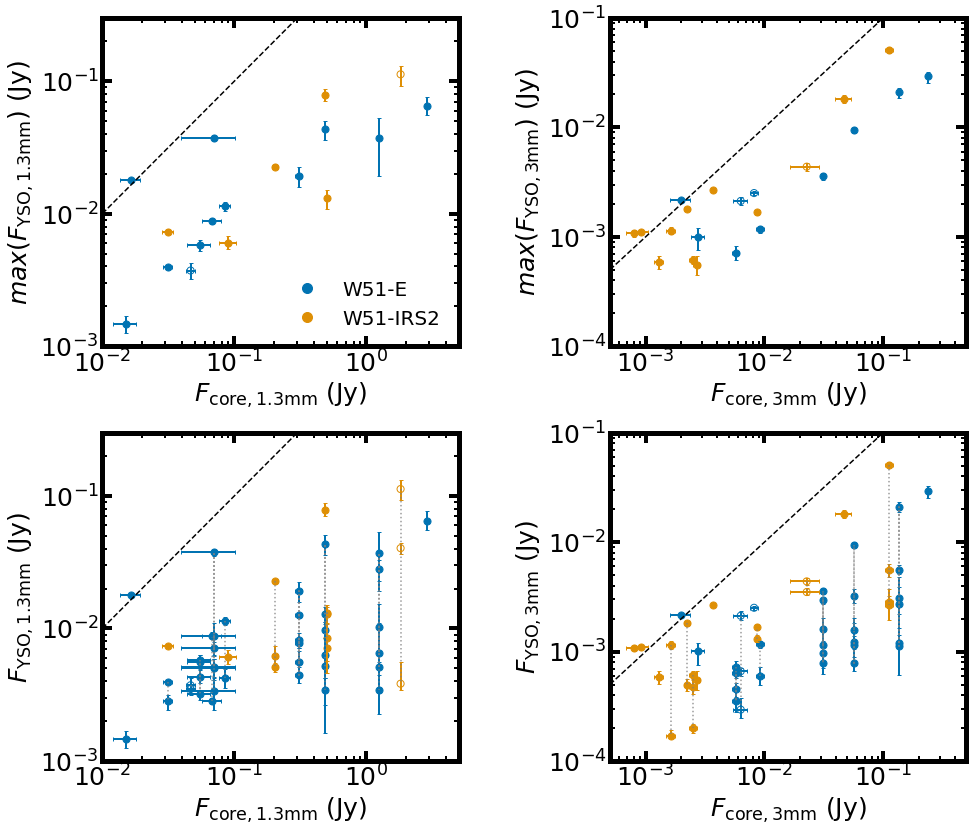

In [26]:
from matplotlib.lines import Line2D
from add_asym import add_asym

w51e_b6_flux_file = '/home/t.yoo/w51/catalogue/photometry/flux_new/w51e_b6_test.fits'
w51e_b3_flux_file = '/home/t.yoo/w51/catalogue/photometry/flux_new/w51e_b3_test.fits'
w51n_b6_flux_file= '/home/t.yoo/w51/catalogue/photometry/flux_new/w51n_b6_test.fits'
w51n_b3_flux_file = '/home/t.yoo/w51/catalogue/photometry/flux_new/w51n_b3_test.fits'
w51e_b6_conv_flux_file = '/home/t.yoo/w51/catalogue/photometry/flux_new/w51e_b6_conv_test.fits'
w51n_b6_conv_flux_file = '/home/t.yoo/w51/catalogue/photometry/flux_new/w51n_b6_conv_test.fits'

Table.read(

ysoflux_upperr_b6_w51e = np.array(catalog_w51e_yso['flux_upperr_b6']) 
ysoflux_upperr_b3_w51e = np.array(catalog_w51e_yso['flux_upperr_b3'])
ysoflux_lowerr_b6_w51e = np.array(catalog_w51e_yso['flux_lowerr_b6'])
ysoflux_lowerr_b3_w51e = np.array(catalog_w51e_yso['flux_lowerr_b3']) 

ysoflux_upperr_b6_w51n = np.array(catalog_w51n_yso['flux_upperr_b6']) 
ysoflux_upperr_b3_w51n = np.array(catalog_w51n_yso['flux_upperr_b3']) 
ysoflux_lowerr_b6_w51n = np.array(catalog_w51n_yso['flux_lowerr_b6']) 
ysoflux_lowerr_b3_w51n = np.array(catalog_w51n_yso['flux_lowerr_b3']) 

ysoflux_b6_w51e = catalog_w51e_yso['flux_b6']
ysoflux_b3_w51e = catalog_w51e_yso['flux_b3']
ysoflux_b6_w51n = catalog_w51n_yso['flux_b6']
ysoflux_b3_w51n = catalog_w51n_yso['flux_b3']

ysoflux_b6_w51e = catalog_w51e_yso['flux_b6']
ysoflux_b3_w51e = catalog_w51e_yso['flux_b3']
ysoflux_b6_w51n = catalog_w51n_yso['flux_b6']
ysoflux_b3_w51n = catalog_w51n_yso['flux_b3']

ysoflux_b6_w51e = np.array([np.nan if flux<0 else flux for flux in ysoflux_b6_w51e])
ysoflux_b3_w51e = np.array([np.nan if flux<0 else flux for flux in ysoflux_b3_w51e])
ysoflux_b6_w51n = np.array([np.nan if flux<0 else flux for flux in ysoflux_b6_w51n])
ysoflux_b3_w51n = np.array([np.nan if flux<0 else flux for flux in ysoflux_b3_w51n])


coreindarr_w51e_woff = multiplicity_w51e_woff.coreindarr
coreindarr_w51n_woff = multiplicity_w51n_woff.coreindarr
coreindarr_w51e_woff_b3 = multiplicity_w51e_woff_b3.coreindarr
coreindarr_w51n_woff_b3 = multiplicity_w51n_woff_b3.coreindarr
coreindarr_w51e_wff = multiplicity_w51e_wff.coreindarr
coreindarr_w51n_wff = multiplicity_w51n_wff.coreindarr
coreindarr_w51e_wff_b3 = multiplicity_w51e_wff_b3.coreindarr
coreindarr_w51n_wff_b3 = multiplicity_w51n_wff_b3.coreindarr

ysoindarr_w51e_woff = multiplicity_w51e_woff.ysoindarr
ysoindarr_w51n_woff = multiplicity_w51n_woff.ysoindarr
ysoindarr_w51e_woff_b3 = multiplicity_w51e_woff_b3.ysoindarr
ysoindarr_w51n_woff_b3 = multiplicity_w51n_woff_b3.ysoindarr
ysoindarr_w51e_wff = multiplicity_w51e_wff.ysoindarr
ysoindarr_w51n_wff = multiplicity_w51n_wff.ysoindarr
ysoindarr_w51e_wff_b3 = multiplicity_w51e_wff_b3.ysoindarr
ysoindarr_w51n_wff_b3 = multiplicity_w51n_wff_b3.ysoindarr

def flatten(xss):
    return [x for xs in xss for x in xs]

### save the data

isinsidecore_w51e_woff_b3fov = np.zeros(len(catalog_w51e_yso['b3_xsky']),dtype=bool)
isinsidecore_w51e_woff_b3fov[flatten(ysoindarr_w51e_woff_b3)] = True
catalog_w51e_yso['isinsidecore_woff_b3fov'] = isinsidecore_w51e_woff_b3fov

isinsidecore_w51e_woff_b6fov = np.zeros(len(catalog_w51e_yso['b6_xsky']),dtype=bool)
isinsidecore_w51e_woff_b6fov[flatten(ysoindarr_w51e_woff) ] = True
catalog_w51e_yso['isinsidecore_woff_b6fov'] = isinsidecore_w51e_woff_b6fov

isinsidecore_w51n_woff_b3fov = np.zeros(len(catalog_w51n_yso['b3_xsky']),dtype=bool)
isinsidecore_w51n_woff_b3fov[flatten(ysoindarr_w51n_woff_b3) ] = True
catalog_w51n_yso['isinsidecore_woff_b3fov'] = isinsidecore_w51n_woff_b3fov

isinsidecore_w51n_woff_b6fov = np.zeros(len(catalog_w51n_yso['b6_xsky']),dtype=bool)
isinsidecore_w51n_woff_b6fov[flatten(ysoindarr_w51n_woff) ] = True
catalog_w51n_yso['isinsidecore_woff_b6fov'] = isinsidecore_w51n_woff_b6fov

catalog_w51e_yso.write(w51e_matched_catalog, overwrite=True)
catalog_w51n_yso.write(w51n_matched_catalog, overwrite=True)

###

coreflux_w51e_b6_woff = core_flux_w51e_b6[coreindarr_w51e_woff]
coreflux_w51e_b3_woff = core_flux_w51e_b3[coreindarr_w51e_woff_b3]
coreflux_w51n_b6_woff = core_flux_w51n_b6[coreindarr_w51n_woff]
coreflux_w51n_b3_woff = core_flux_w51n_b3[coreindarr_w51n_woff_b3]

coreflux_w51e_b6_wff = core_flux_w51e_b6[coreindarr_w51e_wff]
coreflux_w51e_b3_wff = core_flux_w51e_b3[coreindarr_w51e_wff_b3]
coreflux_w51n_b6_wff = core_flux_w51n_b6[coreindarr_w51n_wff]
coreflux_w51n_b3_wff = core_flux_w51n_b3[coreindarr_w51n_wff_b3]

corefluxerr_w51e_b6_woff = core_fluxerr_w51e_b6[coreindarr_w51e_woff]
corefluxerr_w51e_b3_woff = core_fluxerr_w51e_b3[coreindarr_w51e_woff_b3]

corefluxerr_w51n_b6_woff = core_fluxerr_w51n_b6[coreindarr_w51n_woff]
corefluxerr_w51n_b3_woff = core_fluxerr_w51n_b3[coreindarr_w51n_woff_b3]

corefluxerr_w51e_b6_wff = core_fluxerr_w51e_b6[coreindarr_w51e_woff]
corefluxerr_w51e_b3_wff = core_fluxerr_w51e_b3[coreindarr_w51e_woff_b3]

corefluxerr_w51n_b6_wff = core_fluxerr_w51n_b6[coreindarr_w51n_wff]
corefluxerr_w51n_b3_wff = core_fluxerr_w51n_b3[coreindarr_w51n_wff_b3]

coremass_w51e_b6_woff = coremass_w51e[coreindarr_w51e_woff]
coremass_w51e_b3_woff = coremass_w51e[coreindarr_w51e_woff_b3]

coremass_w51n_b6_woff = coremass_w51n[coreindarr_w51n_woff]
coremass_w51n_b3_woff = coremass_w51n[coreindarr_w51n_woff_b3]

coremass_w51e_b6_wff = coremass_w51e[coreindarr_w51e_wff]
coremass_w51e_b3_wff = coremass_w51e[coreindarr_w51e_wff_b3]

coremasserr_w51n_b6_wff = coremasserr_w51n[coreindarr_w51n_wff]
coremasserr_w51n_b3_wff = coremasserr_w51n[coreindarr_w51n_wff_b3]

coremasserr_w51e_b6_woff = coremasserr_w51e[coreindarr_w51e_woff]
coremasserr_w51e_b3_woff = coremasserr_w51e[coreindarr_w51e_woff_b3]

coremasserr_w51n_b6_woff = coremasserr_w51n[coreindarr_w51n_woff]
coremasserr_w51n_b3_woff = coremasserr_w51n[coreindarr_w51n_woff_b3]

coremasserr_w51e_b6_wff = coremasserr_w51e[coreindarr_w51e_wff]
coremasserr_w51e_b3_wff = coremasserr_w51e[coreindarr_w51e_wff_b3]

coremasserr_w51n_b6_wff = coremasserr_w51n[coreindarr_w51n_wff]
coremasserr_w51n_b3_wff = coremasserr_w51n[coreindarr_w51n_wff_b3]

coretemp_w51e_b6_woff = coretemp_w51e[coreindarr_w51e_woff]
coretemp_w51e_b3_woff = coretemp_w51e[coreindarr_w51e_woff_b3]
coretemp_w51n_b6_woff = coretemp_w51n[coreindarr_w51n_woff]
coretemp_w51n_b3_woff = coretemp_w51n[coreindarr_w51n_woff_b3]

coretemp_w51e_b6_wff = coretemp_w51e[coreindarr_w51e_wff]
coretemp_w51e_b3_wff = coretemp_w51e[coreindarr_w51e_wff_b3]
coretemp_w51n_b6_wff = coretemp_w51n[coreindarr_w51n_wff]
coretemp_w51n_b3_wff = coretemp_w51n[coreindarr_w51n_wff_b3]




ysoflux_w51e_b6_woff = [ysoflux_b6_w51e[ind] for ind in ysoindarr_w51e_woff]
ysoflux_w51e_b3_woff = [ysoflux_b3_w51e[ind] for ind in ysoindarr_w51e_woff_b3] 
ysoflux_w51e_b6_woff = [ysoflux_b6_w51e[ind] for ind in ysoindarr_w51e_woff]
ysoflux_w51e_b3_woff = [ysoflux_b3_w51e[ind] for ind in ysoindarr_w51e_woff_b3] 

ysoflux_w51n_b6_woff = [ysoflux_b6_w51n[ind] for ind in ysoindarr_w51n_woff]
ysoflux_w51n_b3_woff = [ysoflux_b3_w51n[ind] for ind in ysoindarr_w51n_woff_b3] 
ysoflux_w51n_b6_woff = [ysoflux_b6_w51n[ind] for ind in ysoindarr_w51n_woff]
ysoflux_w51n_b3_woff = [ysoflux_b3_w51n[ind] for ind in ysoindarr_w51n_woff_b3] 

ysoflux_upperr_w51e_b6_woff = [ysoflux_upperr_b6_w51e[ind] for ind in ysoindarr_w51e_woff]
ysoflux_upperr_w51e_b3_woff = [ysoflux_upperr_b3_w51e[ind] for ind in ysoindarr_w51e_woff_b3] 
ysoflux_lowerr_w51e_b6_woff = [ysoflux_lowerr_b6_w51e[ind] for ind in ysoindarr_w51e_woff]
ysoflux_lowerr_w51e_b3_woff = [ysoflux_lowerr_b3_w51e[ind] for ind in ysoindarr_w51e_woff_b3] 

ysoflux_upperr_w51n_b6_woff = [ysoflux_upperr_b6_w51n[ind] for ind in ysoindarr_w51n_woff]
ysoflux_upperr_w51n_b3_woff = [ysoflux_upperr_b3_w51n[ind] for ind in ysoindarr_w51n_woff_b3] 
ysoflux_lowerr_w51n_b6_woff = [ysoflux_lowerr_b6_w51n[ind] for ind in ysoindarr_w51n_woff]
ysoflux_lowerr_w51n_b3_woff = [ysoflux_lowerr_b3_w51n[ind] for ind in ysoindarr_w51n_woff_b3] 

ysoflux_w51e_b6_wff = [ysoflux_b6_w51e[ind] for ind in ysoindarr_w51e_wff]
ysoflux_w51e_b3_wff = [ysoflux_b3_w51e[ind] for ind in ysoindarr_w51e_wff_b3] 
ysoflux_w51e_b6_wff = [ysoflux_b6_w51e[ind] for ind in ysoindarr_w51e_wff]
ysoflux_w51e_b3_wff = [ysoflux_b3_w51e[ind] for ind in ysoindarr_w51e_wff_b3] 

ysoflux_w51n_b6_wff = [ysoflux_b6_w51n[ind] for ind in ysoindarr_w51n_wff]
ysoflux_w51n_b3_wff = [ysoflux_b3_w51n[ind] for ind in ysoindarr_w51n_wff_b3] 
ysoflux_w51n_b6_wff = [ysoflux_b6_w51n[ind] for ind in ysoindarr_w51n_wff]
ysoflux_w51n_b3_wff = [ysoflux_b3_w51n[ind] for ind in ysoindarr_w51n_wff_b3] 

ysoflux_upperr_w51e_b6_wff = [ysoflux_upperr_b6_w51e[ind] for ind in ysoindarr_w51e_wff]
ysoflux_upperr_w51e_b3_wff = [ysoflux_upperr_b3_w51e[ind] for ind in ysoindarr_w51e_wff_b3] 
ysoflux_lowerr_w51e_b6_wff = [ysoflux_lowerr_b6_w51e[ind] for ind in ysoindarr_w51e_wff]
ysoflux_lowerr_w51e_b3_wff = [ysoflux_lowerr_b3_w51e[ind] for ind in ysoindarr_w51e_wff_b3] 

ysoflux_upperr_w51n_b6_wff = [ysoflux_upperr_b6_w51n[ind] for ind in ysoindarr_w51n_wff]
ysoflux_upperr_w51n_b3_wff = [ysoflux_upperr_b3_w51n[ind] for ind in ysoindarr_w51n_wff_b3] 
ysoflux_lowerr_w51n_b6_wff = [ysoflux_lowerr_b6_w51n[ind] for ind in ysoindarr_w51n_wff]
ysoflux_lowerr_w51n_b3_wff = [ysoflux_lowerr_b3_w51n[ind] for ind in ysoindarr_w51n_wff_b3] 

    

def plot_core_yso_all_frags(ax, coredats, ysodats, coredats_err, ysodats_err_low, ysodats_err_high, color='c'):
    count=0
    for i, coredat in enumerate(coredats):
        
        if len(ysodats[i])>0:
            count =count+1
            lenx = len(ysodats[i])
            if not any(~np.isfinite(ysodats[i])):
                print(np.max(ysodats[i])/np.sort(ysodats[i]))
            for j in range(lenx):
                ax.errorbar(coredat, ysodats[i][j], xerr = coredats_err[i], 
                            yerr=np.array([[ysodats[i][j] - ysodats_err_low[i][j], ysodats_err_high[i][j] - ysodats[i][j]]]).T,
                            capsize=2.0, elinewidth=2, ecolor=color,) 
            if any(~np.isfinite(ysodats[i])):
                ax.plot(np.ones(lenx)*coredat, ysodats[i], ls='dotted', color='gray',alpha=0.8)
                ax.scatter(np.ones(lenx)*coredat, ysodats[i], marker='o', facecolor='none', color=color, s=50)
            else:
                ax.plot(np.ones(lenx)*coredat, ysodats[i], ls='dotted', color='gray',alpha=0.8)
                ax.scatter(np.ones(lenx)*coredat, ysodats[i],marker='o', color=color, s=50)
    print(count)
def plot_core_yso_sum_frags(ax, coredats, ysodats, coredats_err,ysodats_err_low, ysodats_err_high, color='c'):
    for i, coredat in enumerate(coredats):
        
        if len(ysodats[i])>0:
            lenx = len(ysodats[i])
            finiteind = np.isfinite(ysodats[i])
            yerrset = add_asym.add_asym(ysodats[i][finiteind], ysodats[i][finiteind]-ysodats_err_low[i][finiteind], ysodats_err_high[i][finiteind]-ysodats[i][finiteind], order=1)

            if any(~np.isfinite(ysodats[i])):
                ax.scatter(coredat, yerrset[0],color=color, marker='o', facecolor='none',s=50)
                ax.errorbar(coredat, yerrset[0], xerr=coredats_err[i], 
                            yerr=np.array([[np.abs(yerrset[1]),yerrset[2]]]).T,
                           capsize=2.0, elinewidth=2, ecolor=color)
            else:
                ax.scatter(coredat, np.nansum(ysodats[i]),color=color, marker='o',s=50)
                ax.errorbar(coredat, yerrset[0], xerr=coredats_err[i], 
                            yerr=np.array([[np.abs(yerrset[1]),yerrset[2]]]).T,
                           capsize=2.0, elinewidth=2, ecolor=color)
                
            
def plot_core_yso_max_frags(ax, coredats, ysodats, coredats_err,ysodats_err_low, ysodats_err_high, color='c'):
    for i, coredat in enumerate(coredats):
        
        if len(ysodats[i])>0:
            lenx = len(ysodats[i])
            if any(np.isfinite(ysodats[i])):
                maxidx = np.nanargmax(ysodats[i])
                if any(~np.isfinite(ysodats[i])):
                    ax.errorbar(coredat, np.nanmax(ysodats[i]), xerr = coredats_err[i], 
                                    yerr=np.array([[ysodats[i][maxidx] - ysodats_err_low[i][maxidx], 
                                                    ysodats_err_high[i][maxidx] - ysodats[i][maxidx]]]).T,
                                capsize=2.0, elinewidth=2, ecolor=color)
                    ax.scatter(coredat, np.nanmax(ysodats[i]),color=color,s=50, marker='o', facecolor='none')

                else:
                    ax.errorbar(coredat, np.nanmax(ysodats[i]), xerr = coredats_err[i], 
                                    yerr=np.array([[ysodats[i][maxidx] - ysodats_err_low[i][maxidx], 
                                                    ysodats_err_high[i][maxidx] - ysodats[i][maxidx]]]).T,
                                capsize=2.0, elinewidth=2, ecolor=color)
                    ax.scatter(coredat, np.nanmax(ysodats[i]),color=color,s=50, marker='o')

            

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_axes([0.15,0.1,0.33,0.38])
ax2 = fig.add_axes([0.62,0.1,0.33,0.38])

#ax3 = fig.add_axes([0.1,0.41,0.38,0.25])
#ax4 = fig.add_axes([0.58,0.41,0.38,0.25])

ax5 = fig.add_axes([0.15,0.58,0.33,0.38])
ax6 = fig.add_axes([0.62,0.58,0.33,0.38])

plot_core_yso_all_frags(ax1, coreflux_w51e_b6_woff, ysoflux_w51e_b6_woff, corefluxerr_w51e_b6_woff,  ysoflux_lowerr_w51e_b6_woff, ysoflux_upperr_w51e_b6_woff  ,color=cmap[0])
plot_core_yso_all_frags(ax2, coreflux_w51e_b3_woff, ysoflux_w51e_b3_woff, corefluxerr_w51e_b3_woff,  ysoflux_lowerr_w51e_b3_woff, ysoflux_upperr_w51e_b3_woff  ,color=cmap[0])
plot_core_yso_all_frags(ax1, coreflux_w51n_b6_woff, ysoflux_w51n_b6_woff, corefluxerr_w51n_b6_woff,  ysoflux_lowerr_w51n_b6_woff, ysoflux_upperr_w51n_b6_woff  ,color=cmap[1])
plot_core_yso_all_frags(ax2, coreflux_w51n_b3_woff, ysoflux_w51n_b3_woff, corefluxerr_w51n_b3_woff,  ysoflux_lowerr_w51n_b3_woff, ysoflux_upperr_w51n_b3_woff  ,color=cmap[1])
print(ysoflux_w51e_b6_woff)


#plot_core_yso_sum_frags(ax3, coreflux_w51e_b6_woff, ysoflux_w51e_b6_woff, color=cmap[0])
#plot_core_yso_sum_frags(ax4, coreflux_w51e_b3_woff, ysoflux_w51e_b3_woff, color=cmap[0])
#plot_core_yso_sum_frags(ax3, coreflux_w51n_b6_woff, ysoflux_w51n_b6_woff, color=cmap[1])
#plot_core_yso_sum_frags(ax4, coreflux_w51n_b3_woff, ysoflux_w51n_b3_woff, color=cmap[1])

plot_core_yso_max_frags(ax5, coreflux_w51e_b6_woff, ysoflux_w51e_b6_woff, corefluxerr_w51e_b6_woff,  ysoflux_lowerr_w51e_b6_woff, ysoflux_upperr_w51e_b6_woff,color=cmap[0])
plot_core_yso_max_frags(ax6, coreflux_w51e_b3_woff, ysoflux_w51e_b3_woff, corefluxerr_w51e_b3_woff,  ysoflux_lowerr_w51e_b3_woff, ysoflux_upperr_w51e_b3_woff  ,color=cmap[0])
plot_core_yso_max_frags(ax5, coreflux_w51n_b6_woff, ysoflux_w51n_b6_woff, corefluxerr_w51n_b6_woff,  ysoflux_lowerr_w51n_b6_woff, ysoflux_upperr_w51n_b6_woff  ,color=cmap[1])
plot_core_yso_max_frags(ax6, coreflux_w51n_b3_woff, ysoflux_w51n_b3_woff, corefluxerr_w51n_b3_woff,  ysoflux_lowerr_w51n_b3_woff, ysoflux_upperr_w51n_b3_woff  , 
                        color=cmap[1])

ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax1.set_ylim(1e-3,3e-1)
ax1.set_xlim(1e-2,5)
ax2.set_ylim(1e-4,1e-1)
ax2.set_xlim(5e-4,5e-1)
ax1.set_xlabel(r'$F_{\rm core, 1.3mm}$ (Jy)')
ax2.set_xlabel(r'$F_{\rm core, 3mm}$ (Jy)')
ax1.set_ylabel(r'$F_{\rm YSO, 1.3mm}$ (Jy)')
ax2.set_ylabel(r'$F_{\rm YSO, 3mm}$ (Jy)')

ax1.plot([1e-2,5],[1e-2,5], ls='dashed', c='k')
ax2.plot([5e-4,5e-1],[5e-4,5e-1], ls='dashed', c='k')
ax5.plot([1e-2,5],[1e-2,5], ls='dashed', c='k')
ax6.plot([5e-4,5e-1],[5e-4,5e-1], ls='dashed', c='k')


"""
ax3.set_xscale('log')
ax3.set_yscale('log')
ax4.set_xscale('log')
ax4.set_yscale('log')
ax3.set_ylim(1e-3,3e-1)
ax3.set_xlim(1e-2,5)
ax4.set_ylim(1e-4,1e-1)
ax4.set_xlim(5e-4,5e-1)
ax3.set_xlabel(r'$F_{\rm core, 1.3mm}$ (Jy)')
ax4.set_xlabel(r'$F_{\rm core, 3mm}$ (Jy)')
ax3.set_ylabel(r'$sum(F_{\rm YSO, 1.3mm})$ (Jy)')
ax4.set_ylabel(r'$sum(F_{\rm YSO, 3mm})$ (Jy)')

"""
ax5.set_xscale('log')
ax5.set_yscale('log')
ax6.set_xscale('log')
ax6.set_yscale('log')
ax5.set_ylim(1e-3,3e-1)
ax5.set_xlim(1e-2,5)
ax6.set_ylim(1e-4,1e-1)
ax6.set_xlim(5e-4,5e-1)
ax5.set_xlabel(r'$F_{\rm core, 1.3mm}$ (Jy)')
ax6.set_xlabel(r'$F_{\rm core, 3mm}$ (Jy)')
ax5.set_ylabel(r'$max(F_{\rm YSO, 1.3mm})$ (Jy)')
ax6.set_ylabel(r'$max(F_{\rm YSO, 3mm})$ (Jy)')

handles=[]
dummy_w51e = Line2D([0], [0], label='W51-E', marker='o', markersize=10, 
          markerfacecolor=cmap[0], linestyle='',markeredgecolor=cmap[0])
dummy_w51n = Line2D([0], [0], label='W51-IRS2', marker='o', markersize=10, 
          markerfacecolor=cmap[1], linestyle='',markeredgecolor=cmap[1])
handles.extend([dummy_w51e, dummy_w51n])
ax5.legend(handles=handles,fontsize=20, frameon=False)
plt.savefig('core_ysoflux.png')


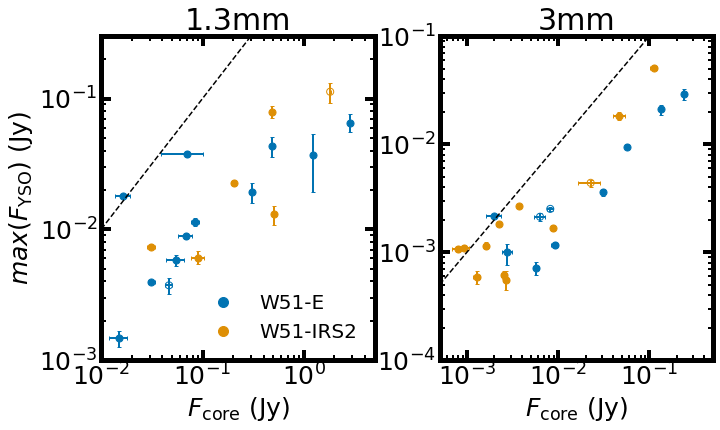

In [22]:
fig = plt.figure(figsize=(10,6))
ax5 = fig.add_axes([0.14,0.17,0.38,0.75])
ax6 = fig.add_axes([0.61,0.17,0.38,0.75])

plot_core_yso_max_frags(ax5, coreflux_w51e_b6_woff, ysoflux_w51e_b6_woff, corefluxerr_w51e_b6_woff,  ysoflux_lowerr_w51e_b6_woff, ysoflux_upperr_w51e_b6_woff,color=cmap[0])
plot_core_yso_max_frags(ax6, coreflux_w51e_b3_woff, ysoflux_w51e_b3_woff, corefluxerr_w51e_b3_woff,  ysoflux_lowerr_w51e_b3_woff, ysoflux_upperr_w51e_b3_woff  ,color=cmap[0])
plot_core_yso_max_frags(ax5, coreflux_w51n_b6_woff, ysoflux_w51n_b6_woff, corefluxerr_w51n_b6_woff,  ysoflux_lowerr_w51n_b6_woff, ysoflux_upperr_w51n_b6_woff  ,color=cmap[1])
plot_core_yso_max_frags(ax6, coreflux_w51n_b3_woff, ysoflux_w51n_b3_woff, corefluxerr_w51n_b3_woff,  ysoflux_lowerr_w51n_b3_woff, ysoflux_upperr_w51n_b3_woff  ,   color=cmap[1])
ax5.plot([1e-2,5],[1e-2,5], ls='dashed', c='k')
ax6.plot([5e-4,5e-1],[5e-4,5e-1], ls='dashed', c='k')
                    
ax5.set_xscale('log')
ax5.set_yscale('log')
ax6.set_xscale('log')
ax6.set_yscale('log')
ax5.set_ylim(1e-3,3e-1)
ax5.set_xlim(1e-2,5)
ax6.set_ylim(1e-4,1e-1)
ax6.set_xlim(5e-4,5e-1)
ax5.set_xlabel(r'$F_{\rm core}$ (Jy)')
ax6.set_xlabel(r'$F_{\rm core}$ (Jy)')
ax5.set_ylabel(r'$max(F_{\rm YSO})$ (Jy)')
#ax6.set_ylabel(r'$max(F_{\rm YSO, 3mm})$ (Jy)')

handles=[]
dummy_w51e = Line2D([0], [0], label='W51-E', marker='o', markersize=10, 
          markerfacecolor=cmap[0], linestyle='',markeredgecolor=cmap[0])
dummy_w51n = Line2D([0], [0], label='W51-IRS2', marker='o', markersize=10, 
          markerfacecolor=cmap[1], linestyle='',markeredgecolor=cmap[1])
handles.extend([dummy_w51e, dummy_w51n])
ax5.legend(handles=handles,fontsize=20, frameon=False)
ax5.set_title('1.3mm',fontsize=30)
ax6.set_title('3mm',fontsize=30)
plt.savefig('core_ysofluxmax.png')

ho 0.7625432724378153
ho 0.2936303859693506
ho 0.6507012883500424
ho 0.3685591251260803
ho 0.9664521812311914
ho 0.3223280270127884
ho 0.7179959581349437
ho 0.23491333650192703
ho 0.935889930164833
ho 0.3581723285272835
ho 0.97546758590704
ho 0.2723346544443902
ho
ho 0.26303677787524077
ho 0.3384772324498059
ho 0.8145262812687666
ho 0.31131006510761644
ho 0.5133738261255306
ho 0.891242243975525
ho 0.10927613544284122
ho 0.7755409735853126
ho 0.7987672917803315
ho 0.27438656237553
ho 0.14813967495663127
ho 0.7771465422602609
[1.]
[10.77375448  7.22062725  5.65058911  3.63824764  1.31140099  1.        ]
[12.66453799  8.30763807  6.95377414  4.43559963  3.40564209  1.        ]
[4.28997393 3.45460408 2.49553739 2.33919313 1.53680347 1.        ]
[2.71326887 1.        ]
[1.81579293 1.33962497 1.03471234 1.        ]
[3.10242956 1.        ]
[1.3927655 1.       ]
[11.14073575  7.40384293  7.34702119  5.3065936   4.25688901  1.        ]
[1.]
[1.]
16
[1.]
[18.47663695 17.65243145  7.75180019  6.7

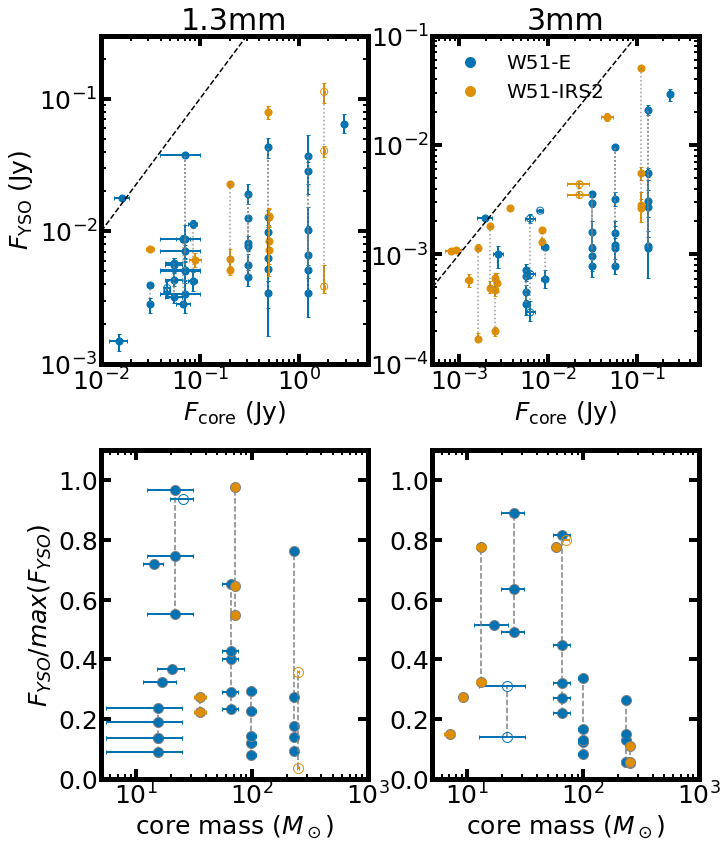

In [23]:
def plot_fluxratio_coremass(ax, coredats, ysodats, coredats_err, ysodats_err_low, ysodats_err_upp, coremass, coremasserr, color='c'):
    count=0
    for i, coredat in enumerate(coredats):
        
        if len(np.where(np.isfinite(ysodats[i]))[0])>1:
            lenx = len(ysodats[i])
            ysodat_sort = np.sort(ysodats[i])
            ysodat_sort_finite = ysodat_sort[np.isfinite(ysodat_sort)]
            
            ysodats_err_low_sort = ysodats_err_low[i][np.argsort(ysodats[i])]
            ysodats_err_low_sort_finite = ysodats_err_low[i][np.isfinite(ysodats_err_low[i])]
            
            ysodats_err_upp_sort = ysodats_err_upp[i][np.argsort(ysodats[i])]
            ysodats_err_upp_sort_finite = ysodats_err_upp[i][np.isfinite(ysodats_err_upp[i])]

            if not any(~np.isfinite(ysodats[i])):
                ax.plot(coremass[i]*np.ones(len(ysodat_sort_finite)-1), ysodat_sort_finite[:-1]/np.nanmax(ysodats[i]), color='gray', mfc=color,ls='dashed',marker='o', markersize=10)
                ax.errorbar(coremass[i]*np.ones(len(ysodat_sort_finite)-1), ysodat_sort_finite[:-1]/np.nanmax(ysodats[i]), 
                            xerr=coremasserr[i], 
                            #yerr=np.array(list(zip(ysodats_err_low_sort_finite[:-1], ysodats_err_upp_sort_finite[:-1]))).T,
                            capsize=2.0, elinewidth=2, ecolor=color,fmt='none')
                            
            else:
                ax.plot(coremass[i]*np.ones(len(ysodat_sort_finite)-1), ysodat_sort_finite[:-1]/np.nanmax(ysodats[i]), color='gray',markeredgecolor=color, mfc='none',ls='dashed',marker='o', markersize=10)
                ax.errorbar(coremass[i]*np.ones(len(ysodat_sort_finite)-1), ysodat_sort_finite[:-1]/np.nanmax(ysodats[i]), 
                            xerr=coremasserr[i], 
                            #yerr=np.array(list(zip(ysodats_err_low_sort_finite[:-1], ysodats_err_upp_sort_finite[:-1]))).T,
                            capsize=2.0, elinewidth=2, ecolor=color,fmt='none')
                    

            print('ho',ysodat_sort_finite[-2]/np.nanmax(ysodats[i]))

fig = plt.figure(figsize=(10,12))
ax1 = fig.add_axes([0.14,0.1,0.37,0.38])
ax2 = fig.add_axes([0.6,0.1,0.37,0.38])

#ax3 = fig.add_axes([0.1,0.41,0.38,0.25])
#ax4 = fig.add_axes([0.58,0.41,0.38,0.25])

ax5 = fig.add_axes([0.14,0.58,0.37,0.38])
ax6 = fig.add_axes([0.6,0.58,0.37,0.38])

plot_fluxratio_coremass(ax1, coreflux_w51e_b6_woff, ysoflux_w51e_b6_woff, corefluxerr_w51e_b6_woff,  ysoflux_lowerr_w51e_b6_woff, ysoflux_upperr_w51e_b6_woff  ,coremass_w51e_b6_woff,coremasserr_w51e_b6_woff,color=cmap[0])
plot_fluxratio_coremass(ax1, coreflux_w51n_b6_woff, ysoflux_w51n_b6_woff, corefluxerr_w51n_b6_woff,  ysoflux_lowerr_w51n_b6_woff, ysoflux_upperr_w51n_b6_woff  ,coremass_w51n_b6_woff,coremasserr_w51n_b6_woff,color=cmap[1])
print('ho')
plot_fluxratio_coremass(ax2, coreflux_w51e_b3_woff, ysoflux_w51e_b3_woff, corefluxerr_w51e_b3_woff,  ysoflux_lowerr_w51e_b3_woff, ysoflux_upperr_w51e_b3_woff  ,coremass_w51e_b3_woff,coremasserr_w51e_b3_woff,color=cmap[0])
plot_fluxratio_coremass(ax2, coreflux_w51n_b3_woff, ysoflux_w51n_b3_woff, corefluxerr_w51n_b3_woff,  ysoflux_lowerr_w51n_b3_woff, ysoflux_upperr_w51n_b3_woff  ,coremass_w51n_b3_woff,coremasserr_w51n_b3_woff,color=cmap[1])

ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlim(5,1e3)
ax2.set_xlim(5,1e3)
ax1.set_ylim(0,1.1)
ax2.set_ylim(0,1.1)
ax1.set_xlabel(r'core mass ($M_\odot$)')
ax2.set_xlabel(r'core mass ($M_\odot$)')
ax1.set_ylabel(r'$F_{YSO}/max(F_{YSO})$')
#ax2.set_ylabel(r'$F_{3mm}/max(F_{3mm})$')

plot_core_yso_all_frags(ax5, coreflux_w51e_b6_woff, ysoflux_w51e_b6_woff, corefluxerr_w51e_b6_woff,  ysoflux_lowerr_w51e_b6_woff, ysoflux_upperr_w51e_b6_woff  ,color=cmap[0])
plot_core_yso_all_frags(ax6, coreflux_w51e_b3_woff, ysoflux_w51e_b3_woff, corefluxerr_w51e_b3_woff,  ysoflux_lowerr_w51e_b3_woff, ysoflux_upperr_w51e_b3_woff  ,color=cmap[0])
plot_core_yso_all_frags(ax5, coreflux_w51n_b6_woff, ysoflux_w51n_b6_woff, corefluxerr_w51n_b6_woff,  ysoflux_lowerr_w51n_b6_woff, ysoflux_upperr_w51n_b6_woff  ,color=cmap[1])
plot_core_yso_all_frags(ax6, coreflux_w51n_b3_woff, ysoflux_w51n_b3_woff, corefluxerr_w51n_b3_woff,  ysoflux_lowerr_w51n_b3_woff, ysoflux_upperr_w51n_b3_woff  ,color=cmap[1])
ax5.set_xscale('log')
ax5.set_yscale('log')
ax6.set_xscale('log')
ax6.set_yscale('log')
ax5.set_ylim(1e-3,3e-1)
ax5.set_xlim(1e-2,5)
ax6.set_ylim(1e-4,1e-1)
ax6.set_xlim(5e-4,5e-1)

ax5.set_xlabel(r'$F_{\rm core}$ (Jy)')
ax6.set_xlabel(r'$F_{\rm core}$ (Jy)')
ax5.set_ylabel(r'$F_{\rm YSO}$ (Jy)')
#ax6.set_ylabel(r'$F_{\rm YSO, 3mm}$ (Jy)')
ax6.legend(handles=handles,fontsize=20, frameon=False)
ax5.plot([1e-2,5],[1e-2,5], ls='dashed', c='k')
ax6.plot([5e-4,5e-1],[5e-4,5e-1], ls='dashed', c='k')
ax5.set_title('1.3mm',fontsize=30)
ax6.set_title('3mm',fontsize=30)
plt.savefig('core_ysofluxall.png')

0 0.023348726017441188 0.02274671837435877
1 0.0737351763828885 0.07339017730785477
2 0.17485131809468846 0.1670881459115657
3 0.19008117509195444 0.18820261203852068
5 0.18597928022146876 0.18533244370726654
6 0.34859769949370273 0.34475079878802745
7 0.17372091816163354 0.1717793846399198
8 0.21665476015414098 0.2157276833543118
9 0.9768133459898948 0.9530408850585519
10 nan 0.15473799607204494
11 1.0972217415345231 1.0899801190854022
15 0.0952493597676438 0.09841610269720993
0 0.12035447378871336 0.1232659889492068
1 0.27679447097573884 0.25681748090991535
2 0.320281953513164 0.30654970527684494
3 0.361252502522902 0.3545859224133868
4 0.30849073270735355 0.30720463653572305
5 0.4999466275263733 0.4878630095747087
6 0.1941245447466639 0.19275875677612964
7 0.3814537348665191 0.37728030340982827
8 1.101177334175965 1.093876074882283
9 0.3678878948992753 0.3626276382449456
0 nan 0.08638230637419057
1 0.16546027575776467 0.16124408901347814
3 0.08449216537642437 0.08234852588201849
4 0

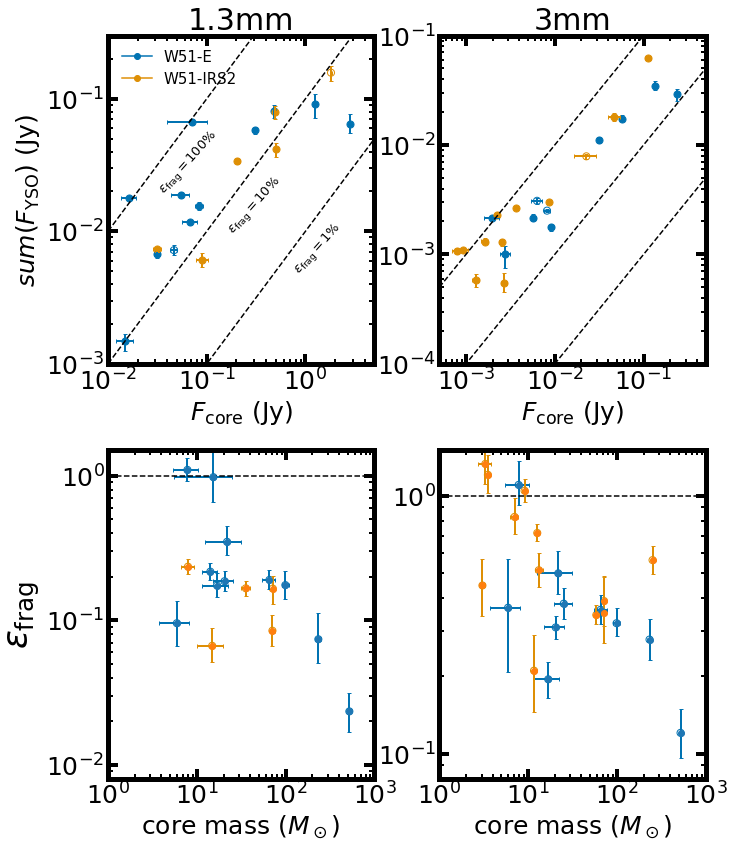

In [24]:
from matplotlib.lines import Line2D
from scipy.stats import pearsonr, bootstrap

def plot_core_to_yso(ax, coredats, ysodats, coredats_err,ysodats_err_low, ysodats_err_high, coremass, coremasserr, color='c'):
    epsilonset = []
    coremassset=[]
    indexset=[]
    for i, coredat in enumerate(coredats):
        
        if len(ysodats[i])>0:
            lenx = len(ysodats[i])
            finiteind = np.isfinite(ysodats[i])
            if any(np.isfinite(ysodats[i])):
                yerrset = add_asym.add_asym(ysodats[i][finiteind], ysodats[i][finiteind]-ysodats_err_low[i][finiteind], ysodats_err_high[i][finiteind]-ysodats[i][finiteind], order=1)
                epsilonset.append(yerrset[0]/coredat)
                coremassset.append(coremass[i].value)
              
                indexset.append(i)
                if any(~np.isfinite(ysodats[i])):            
                    ax.scatter(coremass[i], yerrset[0]/coredat,color=color, marker='o', facecolor='none',s=50)
                else:
                    ax.scatter(coremass[i], yerrset[0]/coredat,color=color,s=50) 
                
        
    
    ax.errorbar(coremass[indexset], epsilonset,xerr=coremasserr[indexset],
            linestyle='',capsize=2.0, elinewidth=2, ecolor=color)
    
  
    return coremassset, epsilonset

def plot_eps_coremass(ax, epsdir, ysodats, coredat, coremass, coremasserr,color='k'):
    idxarr=[]
    epsilonset = []
    coremassset=[]
    eps_med = np.loadtxt(epsdir+'_eps_med.dat')
    eps_low = np.loadtxt(epsdir+'_eps_low.dat')
    eps_upp = np.loadtxt(epsdir+'_eps_upp.dat')
    j=0
    for i,ysodat in enumerate(ysodats):
        if len(ysodat)>0:
            if any(np.isfinite(ysodats[i])):
                finiteind = np.isfinite(ysodats[i])

                print(i, eps_med[j], np.sum(ysodats[i][finiteind])/coredat[i])
                epsilonset.append(eps_med[j])
                coremassset.append(coremass[i].value)
                idxarr.append(i)
                j=j+1
        
    ax.errorbar(coremass[idxarr], eps_med,xerr=coremasserr[idxarr],
                yerr=np.array(list(zip(eps_med - eps_low, 
                                                eps_upp -eps_med))).T,
            linestyle='',capsize=2.0, elinewidth=2, ecolor=color, fmt='o')
    ax.scatter(coremass[idxarr], eps_med,color=color,s=50, marker='o', facecolor='none')

    
    return coremassset, epsilonset
    
def pearson_for_bootstrap1(x, y):
    a = pearsonr(x, y)[0]
    return a
def pearson_for_bootstrap2(x, y):
    a = pearsonr(x, y)[1]
    return a                
fig = plt.figure(figsize=(10,12))
ax3 = fig.add_axes([0.14,0.1,0.37,0.38])
ax4 = fig.add_axes([0.6,0.1,0.37,0.38])

#ax3 = fig.add_axes([0.1,0.41,0.38,0.25])
#ax4 = fig.add_axes([0.58,0.41,0.38,0.25])

ax1 = fig.add_axes([0.14,0.58,0.37,0.38])
ax2 = fig.add_axes([0.6,0.58,0.37,0.38])

plot_core_yso_sum_frags(ax1, coreflux_w51e_b6_woff, ysoflux_w51e_b6_woff, corefluxerr_w51e_b6_woff,  ysoflux_lowerr_w51e_b6_woff, ysoflux_upperr_w51e_b6_woff,color=cmap[0])
plot_core_yso_sum_frags(ax2, coreflux_w51e_b3_woff, ysoflux_w51e_b3_woff, corefluxerr_w51e_b3_woff,  ysoflux_lowerr_w51e_b3_woff, ysoflux_upperr_w51e_b3_woff  ,color=cmap[0])
plot_core_yso_sum_frags(ax1, coreflux_w51n_b6_woff, ysoflux_w51n_b6_woff, corefluxerr_w51n_b6_woff,  ysoflux_lowerr_w51n_b6_woff, ysoflux_upperr_w51n_b6_woff  ,color=cmap[1])
plot_core_yso_sum_frags(ax2, coreflux_w51n_b3_woff, ysoflux_w51n_b3_woff, corefluxerr_w51n_b3_woff,  ysoflux_lowerr_w51n_b3_woff, ysoflux_upperr_w51n_b3_woff  , color=cmap[1])
#coremass_w51e_b6, eps_w51e_b6 = plot_core_to_yso(ax3, coreflux_w51e_b6_woff, ysoflux_w51e_b6_woff, corefluxerr_w51e_b6_woff,  ysoflux_lowerr_w51e_b6_woff, ysoflux_upperr_w51e_b6_woff, coremass_w51e_b6_woff, coremasserr_w51e_b6_woff,color=cmap[0])
#coremass_w51e_b3, eps_w51e_b3 = plot_core_to_yso(ax4, coreflux_w51e_b3_woff, ysoflux_w51e_b3_woff, corefluxerr_w51e_b3_woff,  ysoflux_lowerr_w51e_b3_woff, ysoflux_upperr_w51e_b3_woff, coremass_w51e_b3_woff ,coremasserr_w51e_b3_woff,color=cmap[0])
#coremass_w51n_b6, eps_w51n_b6 = plot_core_to_yso(ax3, coreflux_w51n_b6_woff, ysoflux_w51n_b6_woff, corefluxerr_w51n_b6_woff,  ysoflux_lowerr_w51n_b6_woff, ysoflux_upperr_w51n_b6_woff,  coremass_w51n_b6_woff,coremasserr_w51n_b6_woff,color=cmap[1])
#coremass_w51n_b3, eps_w51n_b3 = plot_core_to_yso(ax4, coreflux_w51n_b3_woff, ysoflux_w51n_b3_woff, corefluxerr_w51n_b3_woff,  ysoflux_lowerr_w51n_b3_woff, ysoflux_upperr_w51n_b3_woff, coremass_w51n_b3_woff,coremasserr_w51n_b3_woff, 
#                        color=cmap[1])

coremass_w51e_b6, eps_w51e_b6 = plot_eps_coremass(ax3, '/home/t.yoo/w51/catalogue/comparison_almaimf/w51e_b6', ysoflux_w51e_b6_woff, coreflux_w51e_b6_woff,coremass_w51e_b6_woff, coremasserr_w51e_b6_woff,color=cmap[0])
coremass_w51e_b3, eps_w51e_b3 = plot_eps_coremass(ax4, '/home/t.yoo/w51/catalogue/comparison_almaimf/w51e_b3', ysoflux_w51e_b3_woff, coreflux_w51e_b3_woff,coremass_w51e_b3_woff, coremasserr_w51e_b3_woff,color=cmap[0])
coremass_w51n_b6, eps_w51n_b6 = plot_eps_coremass(ax3, '/home/t.yoo/w51/catalogue/comparison_almaimf/w51n_b6', ysoflux_w51n_b6_woff, coreflux_w51n_b6_woff,coremass_w51n_b6_woff, coremasserr_w51n_b6_woff,color=cmap[1])
coremass_w51n_b3, eps_w51n_b3 = plot_eps_coremass(ax4, '/home/t.yoo/w51/catalogue/comparison_almaimf/w51n_b3', ysoflux_w51n_b3_woff, coreflux_w51n_b3_woff,coremass_w51n_b3_woff, coremasserr_w51n_b3_woff,color=cmap[1])

eps_b6 = np.append(eps_w51e_b6, eps_w51n_b6)
eps_b3 = np.append(eps_w51e_b3, eps_w51n_b3)

coremass_b6 = np.append(coremass_w51e_b6, coremass_w51n_b6)
coremass_b3 = np.append(coremass_w51e_b3, coremass_w51n_b3)
rng = np.random.default_rng()
rng2 = np.random.default_rng()

res_b6 = bootstrap((np.log10(coremass_b6)[np.isfinite(eps_b6)], np.log10(eps_b6)[np.isfinite(eps_b6)]), pearson_for_bootstrap1, confidence_level = 0.9, paired=True, vectorized=False, random_state=rng, n_resamples=1000) 
res_p_b6 = bootstrap((np.log10(coremass_b6)[np.isfinite(eps_b6)], np.log10(eps_b6)[np.isfinite(eps_b6)]), pearson_for_bootstrap2, confidence_level = 0.9, paired=True, vectorized=False, random_state=rng, n_resamples=1000) 

res_b3 = bootstrap((np.log10(coremass_b3)[np.isfinite(eps_b3)], np.log10(eps_b3)[np.isfinite(eps_b3)]), pearson_for_bootstrap1, confidence_level = 0.9, paired=True, vectorized=False, random_state=rng2, n_resamples=1000) 
res_p_b3 = bootstrap((np.log10(coremass_b3)[np.isfinite(eps_b3)], np.log10(eps_b3)[np.isfinite(eps_b3)]), pearson_for_bootstrap2, confidence_level = 0.9, paired=True, vectorized=False, random_state=rng2, n_resamples=1000) 

print(coremass_b6, eps_b6)
print(coremass_b3, eps_b3)
print(res_b6)
print(res_b3)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax1.set_ylim(1e-3,3e-1)
ax1.set_xlim(1e-2,5)
ax2.set_ylim(1e-4,1e-1)
ax2.set_xlim(5e-4,5e-1)
ax1.set_xlabel(r'$F_{\rm core}$ (Jy)')
ax2.set_xlabel(r'$F_{\rm core}$ (Jy)')
ax1.set_ylabel(r'$sum(F_{\rm YSO})$ (Jy)')
#ax2.set_ylabel(r'$sum(F_{\rm YSO, 3mm})$ (Jy)')
handles, labels = plt.gca().get_legend_handles_labels()

point1 = Line2D([0], [0], label='W51-E', marker='o',color=cmap[0])
point2 = Line2D([0], [0], label='W51-IRS2', marker='o',color=cmap[1])               
handles.extend([point1,point2])

ax1.legend(fontsize=15,handles=handles, frameon=False)
ax1.plot([1e-2,5],[1e-2,5], ls='dashed', c='k')
ax2.plot([5e-4,5e-1],[5e-4,5e-1], ls='dashed', c='k')

ax1.plot([1e-2,5],[1e-3,5e-1], ls='dashed', c='k')
ax2.plot([5e-4,5e-1],[5e-5,5e-2], ls='dashed', c='k')

ax1.plot([1e-2,5],[1e-4,5e-2], ls='dashed', c='k')
ax2.plot([5e-4,5e-1],[5e-6,5e-3], ls='dashed', c='k')

ax3.set_xscale('log')
ax3.set_yscale('log')
ax4.set_xscale('log')
ax4.set_yscale('log')

ax3.set_ylabel(r'$\epsilon_{\rm frag}$', fontsize=35)
#ax4.set_ylabel(r'$\epsilon_{\rm frag, 3mm}$', fontsize=35)
ax3.set_xlabel(r'core mass ($M_\odot$)')
ax4.set_xlabel(r'core mass ($M_\odot$)')

ax3.plot([1,1e3],[1,1],ls='dashed',c='k')
ax4.plot([1,1e3],[1,1],ls='dashed',c='k')

ax3.set_xlim(1,1e3)
ax4.set_xlim(1,1e3)
ax3.set_ylim(8e-3,1.5)
ax4.set_ylim(8e-2,1.5)

ax1.text(3e-2,2e-2,r'$\epsilon_{\rm frag}=100\%$', rotation=48,fontsize=13)
ax1.text(1.5e-1,1e-2,r'$\epsilon_{\rm frag}=10\%$', rotation=48,fontsize=13)
ax1.text(7e-1,5e-3,r'$\epsilon_{\rm frag}=1\%$', rotation=48,fontsize=13)
ax1.set_title('1.3mm',fontsize=30)
ax2.set_title('3mm',fontsize=30)
plt.savefig('epsilon_frag.png')

AttributeError: 'BootstrapResult' object has no attribute 'bootstrap_distribution'

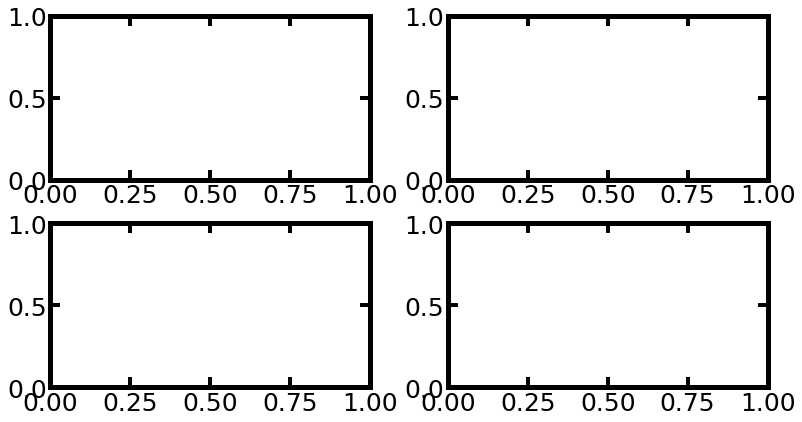

In [25]:
fig = plt.figure(figsize=(12,6))
ax3 = fig.add_axes([0.14,0.1,0.37,0.38])
ax4 = fig.add_axes([0.6,0.1,0.37,0.38])
ax1 = fig.add_axes([0.14,0.58,0.37,0.38])
ax2 = fig.add_axes([0.6,0.58,0.37,0.38])
ax1.hist(res_b3.bootstrap_distribution[1], bins=25, density=True)
ax2.hist(res_b6.bootstrap_distribution[1], bins=25, density=True)
ax3.hist(res_b3.bootstrap_distribution[0], bins=25, density=True)
ax4.hist(res_b6.bootstrap_distribution[0], bins=25, density=True)
#ax1.set_xscale('log')
#ax2.set_xscale('log')


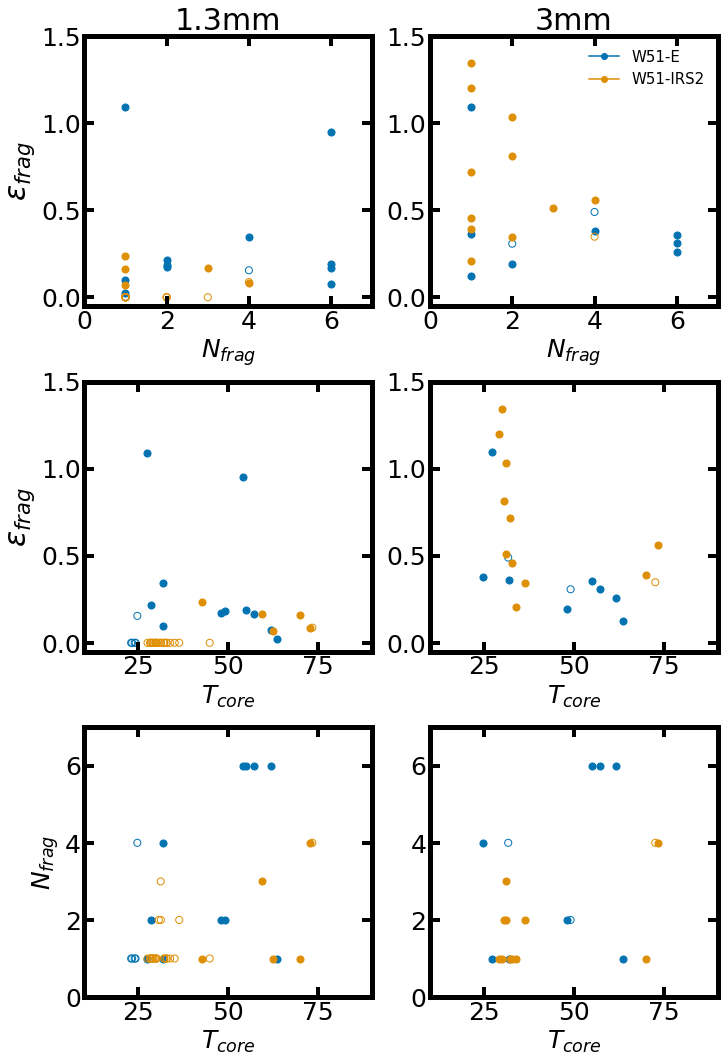

In [ ]:
def plot_core_to_yso2(ax, coredats, ysodats, coredats_err,ysodats_err_low, ysodats_err_high, coremass,  color='c'):
    epsilonset = []
    indexset=[]
    for i, coredat in enumerate(coredats):
        
        if len(ysodats[i])>0:
            lenx = len(ysodats[i])
            finiteind = np.isfinite(ysodats[i])
            yerrset = add_asym.add_asym(ysodats[i][finiteind], ysodats[i][finiteind]-ysodats_err_low[i][finiteind], ysodats_err_high[i][finiteind]-ysodats[i][finiteind], order=1)
            epsilonset.append(yerrset[0]/coredat)
            indexset.append(i)
            if any(~np.isfinite(ysodats[i])):            
                ax.scatter(coremass[i], yerrset[0]/coredat,color=color, marker='o', facecolor='none',s=50)
            else:
                ax.scatter(coremass[i], yerrset[0]/coredat,color=color,s=50)
    
                
def plot_core_nfrag(ax, coredats, ysodats, coredats_err,ysodats_err_low, ysodats_err_high, coremass,  color='c'):
    epsilonset = []
    indexset=[]
    for i, coredat in enumerate(coredats):
        
        if len(ysodats[i])>0:
            lenx = len(ysodats[i])
            finiteind = np.isfinite(ysodats[i])
            yerrset = add_asym.add_asym(ysodats[i][finiteind], ysodats[i][finiteind]-ysodats_err_low[i][finiteind], ysodats_err_high[i][finiteind]-ysodats[i][finiteind], order=1)
            epsilonset.append(yerrset[0]/coredat)
            indexset.append(i)
            if any(~np.isfinite(ysodats[i])):            
                ax.scatter(coremass[i], len(ysodats[i]),color=color, marker='o', facecolor='none',s=50)
            else:
                ax.scatter(coremass[i], len(ysodats[i]),color=color,s=50) 
                
def plot_epsilon_nfrag(ax, coredats, ysodats, coredats_err,ysodats_err_low, ysodats_err_high, color='c'):
    epsilonset = []
    indexset=[]
    for i, coredat in enumerate(coredats):
        
        if len(ysodats[i])>0:
            lenx = len(ysodats[i])
            finiteind = np.isfinite(ysodats[i])
            yerrset = add_asym.add_asym(ysodats[i][finiteind], ysodats[i][finiteind]-ysodats_err_low[i][finiteind], ysodats_err_high[i][finiteind]-ysodats[i][finiteind], order=1)
            epsilonset.append(yerrset[0]/coredat)
            indexset.append(i)
            if any(~np.isfinite(ysodats[i])):            
                ax.scatter(len(ysodats[i]), yerrset[0]/coredat,color=color, marker='o', facecolor='none',s=50)
            else:
                ax.scatter(len(ysodats[i]), yerrset[0]/coredat,color=color,s=50) 
    
    #ax.errorbar(coremass[indexset], epsilonset,xerr=coremasserr[indexset],
    #        linestyle='',capsize=2.0, elinewidth=2, ecolor=color)
    
fig = plt.figure(figsize=(10,15))
ax3 = fig.add_axes([0.11,0.08,0.4,0.25])
ax4 = fig.add_axes([0.59,0.08,0.4,0.25])
ax1 = fig.add_axes([0.11,0.4,0.4,0.25])
ax2 = fig.add_axes([0.59,0.4,0.4,0.25])  
ax5 = fig.add_axes([0.11,0.72,0.4,0.25])
ax6 = fig.add_axes([0.59,0.72,0.4,0.25])  

plot_epsilon_nfrag(ax5, coreflux_w51e_b6_woff, ysoflux_w51e_b6_woff, corefluxerr_w51e_b6_woff,  ysoflux_lowerr_w51e_b6_woff, ysoflux_upperr_w51e_b6_woff,color=cmap[0])
plot_epsilon_nfrag(ax6, coreflux_w51e_b3_woff, ysoflux_w51e_b3_woff, corefluxerr_w51e_b3_woff,  ysoflux_lowerr_w51e_b3_woff, ysoflux_upperr_w51e_b3_woff  ,color=cmap[0])
plot_epsilon_nfrag(ax5, coreflux_w51n_b6_woff, ysoflux_w51n_b6_woff, corefluxerr_w51n_b6_woff,  ysoflux_lowerr_w51n_b6_woff, ysoflux_upperr_w51n_b6_woff  ,color=cmap[1])
plot_epsilon_nfrag(ax6, coreflux_w51n_b3_woff, ysoflux_w51n_b3_woff, corefluxerr_w51n_b3_woff,  ysoflux_lowerr_w51n_b3_woff, ysoflux_upperr_w51n_b3_woff  , 
                        color=cmap[1])
plot_core_nfrag(ax3, coreflux_w51e_b6_woff, ysoflux_w51e_b6_woff, corefluxerr_w51e_b6_woff,  ysoflux_lowerr_w51e_b6_woff, ysoflux_upperr_w51e_b6_woff,coretemp_w51e_b6_woff,color=cmap[0])
plot_core_nfrag(ax4, coreflux_w51e_b3_woff, ysoflux_w51e_b3_woff, corefluxerr_w51e_b3_woff,  ysoflux_lowerr_w51e_b3_woff, ysoflux_upperr_w51e_b3_woff  ,coretemp_w51e_b3_woff,color=cmap[0])
plot_core_nfrag(ax3, coreflux_w51n_b6_woff, ysoflux_w51n_b6_woff, corefluxerr_w51n_b6_woff,  ysoflux_lowerr_w51n_b6_woff, ysoflux_upperr_w51n_b6_woff  ,coretemp_w51n_b6_woff,color=cmap[1])
plot_core_nfrag(ax4, coreflux_w51n_b3_woff, ysoflux_w51n_b3_woff, corefluxerr_w51n_b3_woff,  ysoflux_lowerr_w51n_b3_woff, ysoflux_upperr_w51n_b3_woff  ,coretemp_w51n_b3_woff, 
                        color=cmap[1])
plot_core_to_yso2(ax1, coreflux_w51e_b6_woff, ysoflux_w51e_b6_woff, corefluxerr_w51e_b6_woff,  ysoflux_lowerr_w51e_b6_woff, ysoflux_upperr_w51e_b6_woff, coretemp_w51e_b6_woff, color=cmap[0])
plot_core_to_yso2(ax2, coreflux_w51e_b3_woff, ysoflux_w51e_b3_woff, corefluxerr_w51e_b3_woff,  ysoflux_lowerr_w51e_b3_woff, ysoflux_upperr_w51e_b3_woff, coretemp_w51e_b3_woff ,color=cmap[0])
plot_core_to_yso2(ax1, coreflux_w51n_b6_woff, ysoflux_w51n_b6_woff, corefluxerr_w51n_b6_woff,  ysoflux_lowerr_w51n_b6_woff, ysoflux_upperr_w51n_b6_woff,  coretemp_w51n_b6_woff,color=cmap[1])
plot_core_to_yso2(ax2, coreflux_w51n_b3_woff, ysoflux_w51n_b3_woff, corefluxerr_w51n_b3_woff,  ysoflux_lowerr_w51n_b3_woff, ysoflux_upperr_w51n_b3_woff, coretemp_w51n_b3_woff, 
                        color=cmap[1])
ax5.set_title('1.3mm',fontsize=30)
ax6.set_title('3mm',fontsize=30)
ax5.set_xlabel('$N_{frag}$')
ax6.set_xlabel('$N_{frag}$')
ax5.set_ylabel(r'$\epsilon_{frag}$',fontsize=30)
#ax6.set_ylabel(r'$\epsilon_{frag, 3mm}$')
ax3.set_xlabel('$T_{core}$')
ax4.set_xlabel('$T_{core}$')
ax3.set_xlim(10,90)
ax4.set_xlim(10,90)
ax1.set_xlim(10,90)
ax2.set_xlim(10,90)
ax5.set_xlim(0,7)
ax6.set_xlim(0,7)
ax5.set_ylim(-0.05,1.5)
ax6.set_ylim(-0.05,1.5)
ax1.set_ylim(-0.05,1.5)
ax2.set_ylim(-0.05,1.5)
ax3.set_ylim(0,7)
ax4.set_ylim(0,7)
ax5.set_xticks([0,2,4,6])
ax6.set_xticks([0,2,4,6])
ax5.set_yticks([0,0.5,1,1.5])
ax6.set_yticks([0,0.5,1,1.5])

ax6.legend(fontsize=15,handles=handles, frameon=False)
ax3.set_ylabel('$N_{frag}$')
#ax4.set_ylabel('$N_{frag}$')
ax1.set_xlabel('$T_{core}$')
ax2.set_xlabel('$T_{core}$')
ax1.set_ylabel(r'$\epsilon_{frag}$',fontsize=30)
#ax2.set_ylabel(r'$\epsilon_{frag, 3mm}$')
plt.savefig('epsilon_nfrag.png')

Text(0.5, 1.0, '3mm')

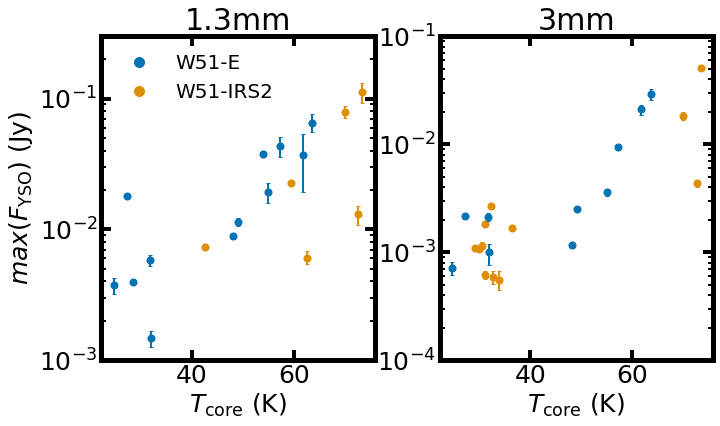

In [ ]:
fig = plt.figure(figsize=(10,6))
ax5 = fig.add_axes([0.14,0.17,0.38,0.75])
ax6 = fig.add_axes([0.61,0.17,0.38,0.75])
def plot_core_yso_max_frags2(ax, coredats, ysodats, ysodats_err_low, ysodats_err_high, color='c'):
    for i, coredat in enumerate(coredats):
        
        if len(ysodats[i])>0:
            lenx = len(ysodats[i])
            if any(np.isfinite(ysodats[i])):
                maxidx = np.nanargmax(ysodats[i])
                ax.errorbar(coredat, np.nanmax(ysodats[i]),  
                                yerr=np.array([[ysodats[i][maxidx] - ysodats_err_low[i][maxidx], 
                                                ysodats_err_high[i][maxidx] - ysodats[i][maxidx]]]).T,
                            capsize=2.0, elinewidth=2, ecolor=color)
                ax.scatter(coredat, np.nanmax(ysodats[i]),color=color,s=50)
plot_core_yso_max_frags2(ax5, coretemp_w51e_b6_woff, ysoflux_w51e_b6_woff,   ysoflux_lowerr_w51e_b6_woff, ysoflux_upperr_w51e_b6_woff,color=cmap[0])
plot_core_yso_max_frags2(ax6, coretemp_w51e_b3_woff, ysoflux_w51e_b3_woff,  ysoflux_lowerr_w51e_b3_woff, ysoflux_upperr_w51e_b3_woff  ,color=cmap[0])
plot_core_yso_max_frags2(ax5, coretemp_w51n_b6_woff, ysoflux_w51n_b6_woff,   ysoflux_lowerr_w51n_b6_woff, ysoflux_upperr_w51n_b6_woff  ,color=cmap[1])
plot_core_yso_max_frags2(ax6, coretemp_w51n_b3_woff, ysoflux_w51n_b3_woff,   ysoflux_lowerr_w51n_b3_woff, ysoflux_upperr_w51n_b3_woff  ,   color=cmap[1])
#ax5.plot([1e-2,5],[1e-2,5], ls='dashed', c='k')
#ax6.plot([5e-4,5e-1],[5e-4,5e-1], ls='dashed', c='k')
                    
#ax5.set_xscale('log')
ax5.set_yscale('log')
#ax6.set_xscale('log')
ax6.set_yscale('log')
ax5.set_ylim(1e-3,3e-1)
#ax5.set_xlim(1e-2,5)
ax6.set_ylim(1e-4,1e-1)

#ax6.set_xlim(5e-4,5e-1)
ax5.set_xlabel(r'$T_{\rm core}$ (K)')
ax6.set_xlabel(r'$T_{\rm core}$ (K)')
ax5.set_ylabel(r'$max(F_{\rm YSO})$ (Jy)')
#ax6.set_ylabel(r'$max(F_{\rm YSO, 3mm})$ (Jy)')

handles=[]
dummy_w51e = Line2D([0], [0], label='W51-E', marker='o', markersize=10, 
          markerfacecolor=cmap[0], linestyle='',markeredgecolor=cmap[0])
dummy_w51n = Line2D([0], [0], label='W51-IRS2', marker='o', markersize=10, 
          markerfacecolor=cmap[1], linestyle='',markeredgecolor=cmap[1])
handles.extend([dummy_w51e, dummy_w51n])
ax5.legend(handles=handles,fontsize=20, frameon=False)
ax5.set_title('1.3mm',fontsize=30)
ax6.set_title('3mm',fontsize=30)


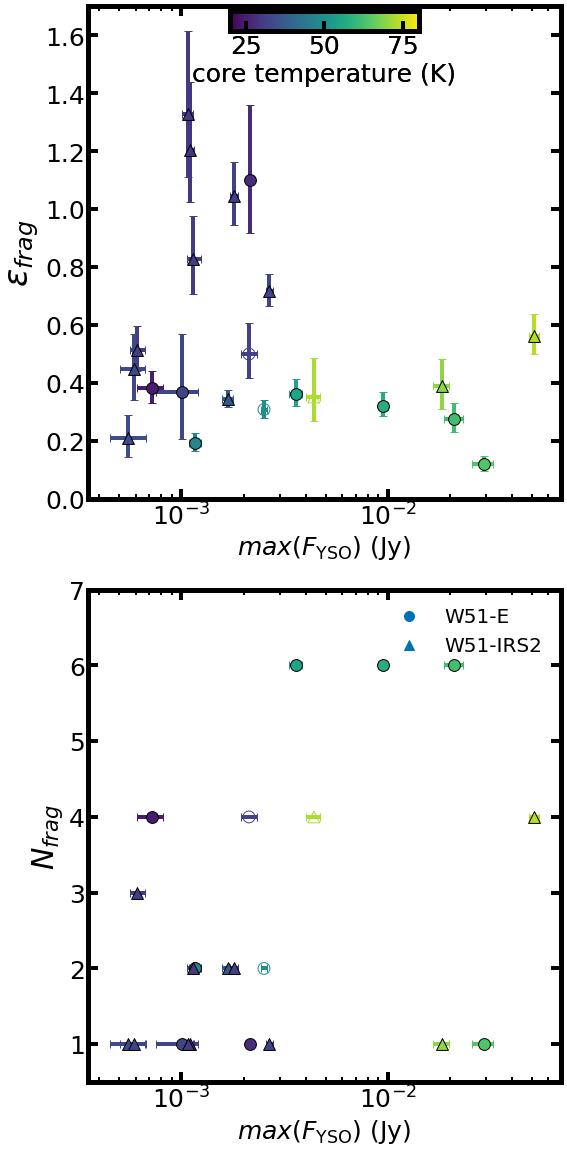

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def plot_maxyso_frag(ax1, ax2, ax3, epsdir, coredats, ysodats, ysodats_err_low, ysodats_err_high,coretemp, marker='o'):
    cmap = sns.color_palette("viridis", as_cmap=True)
    norm = matplotlib.colors.Normalize(vmin=20, vmax=80, clip=True)
   
    mapper = cm.ScalarMappable(norm=norm, cmap=cmap)
    color = np.array([(mapper.to_rgba(v)) for v in coretemp])
    
    eps_med = np.loadtxt(epsdir+'_eps_med.dat')
    eps_low = np.loadtxt(epsdir+'_eps_low.dat')
    eps_upp = np.loadtxt(epsdir+'_eps_upp.dat')
    j=0
    for i, coredat in enumerate(coredats):
        
        if len(ysodats[i])>0:
            lenx = len(ysodats[i])
            #eps = np.sum(np.nansum(ysodats[i]))/coredats[i]
            if any(np.isfinite(ysodats[i])):
                maxidx = np.nanargmax(ysodats[i])
                ax1.errorbar(np.nanmax(ysodats[i]), lenx, 
                                xerr=np.array([[ysodats[i][maxidx] - ysodats_err_low[i][maxidx], 
                                                ysodats_err_high[i][maxidx] - ysodats[i][maxidx]]]).T,
                            capsize=4.0, elinewidth=4, color=color[i])
                if any(~np.isfinite(ysodats[i])):            
                    ax1.scatter(np.nanmax(ysodats[i]), lenx, color=color[i],  facecolor='none',s=140,marker=marker,vmin=20,vmax=80,cmap=cmap,zorder=50)
                else:
                    ax1.scatter(np.nanmax(ysodats[i]), lenx, edgecolors='k',color=color[i],s=140, marker=marker,vmin=20,vmax=80,cmap=cmap,zorder=50)
                
                ax2.errorbar(np.nanmax(ysodats[i]), eps_med[j], 
                                xerr=np.array([[ysodats[i][maxidx] - ysodats_err_low[i][maxidx], 
                                                ysodats_err_high[i][maxidx] - ysodats[i][maxidx]]]).T,
                             yerr=np.array([[eps_med[j]-eps_low[j], eps_upp[j]-eps_med[j]]]).T,
                            capsize=4.0, elinewidth=4, color=color[i])
                if any(~np.isfinite(ysodats[i])):            
                    ax2.scatter(np.nanmax(ysodats[i]), eps_med[j], color=color[i],  facecolor='none',s=140,marker=marker,vmin=20,vmax=80,cmap=cmap,zorder=50)
                else:
                    pp=ax2.scatter(np.nanmax(ysodats[i]), eps_med[j], edgecolors='k',color=color[i],s=140, marker=marker,vmin=20,vmax=80,cmap=cmap,zorder=50)
                
                if len(np.where(np.isfinite(ysodats[i])==True)[0])>1:
                    ysodats_finite = ysodats[i][np.isfinite(ysodats[i])]
                    ysodats_sort = np.sort(ysodats_finite)
                    ax3.scatter(np.nanmax(ysodats[i]), ysodats_sort[-2]/np.nanmax(ysodats[i]), color=color[i], edgecolors='k', s=140, marker=marker, vmin=20, vmax=80, cmap=cmap )
                j=j+1
    axins1 = inset_axes(
    ax2,
    width="40%",  # width: 50% of parent_bbox width
    height="4%",  # height: 5%
    loc="upper center",)
    axins1.xaxis.set_ticks_position("bottom")
    axcbr = fig.colorbar(mapper, cax=axins1, orientation="horizontal", )
    axcbr.set_label('core temperature (K)', )

fig = plt.figure(figsize=(25,8))
ax1 = fig.add_axes([0.08,0.15,0.25,0.8])
ax2 = fig.add_axes([0.4,0.15,0.25,0.8])
ax3 = fig.add_axes([0.72,0.15,0.25,0.8])

plot_maxyso_frag(ax1, ax2, '/home/t.yoo/w51/catalogue/comparison_almaimf/w51e_b3', coreflux_w51e_b3_woff, ysoflux_w51e_b3_woff,  ysoflux_lowerr_w51e_b3_woff, ysoflux_upperr_w51e_b3_woff, coretemp_w51e_b3_woff, marker='o')
plot_maxyso_frag(ax1, ax2, '/home/t.yoo/w51/catalogue/comparison_almaimf/w51n_b3',  coreflux_w51n_b3_woff, ysoflux_w51n_b3_woff,  ysoflux_lowerr_w51n_b3_woff, ysoflux_upperr_w51n_b3_woff, coretemp_w51n_b3_woff, marker='^')

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax3.set_xlabel(r'$max(F_{\rm YSO})$ (Jy)')

ax2.set_xlabel(r'$max(F_{\rm YSO})$ (Jy)')
ax1.set_xlabel(r'$max(F_{\rm YSO})$ (Jy)')
ax1.set_ylabel('$N_{frag}$',fontsize=30)
ax2.set_ylabel(r'$\epsilon_{frag}$',fontsize=34)
ax3.set_ylabel('second(F_{\rm YSO})/max(F_{\rm YSO})')

handles=[]
dummy_w51e = Line2D([0], [0], label='W51-E', marker='o', markersize=10, 
          markerfacecolor=cmap[0], linestyle='',markeredgecolor=cmap[0])
dummy_w51n = Line2D([0], [0], label='W51-IRS2', marker='^', markersize=10, 
          markerfacecolor=cmap[0], linestyle='',markeredgecolor=cmap[0])
handles.extend([dummy_w51e, dummy_w51n])
ax1.legend(handles=handles,fontsize=20, frameon=False)
ax1.set_ylim(0.5,7)
ax2.set_ylim(0,1.7)

plt.savefig('n_frag_e_frag.png')

In [ ]:
def plot_core_yso_max_nfrags(ax, coredats,ysodats, ysodats_err_low, ysodats_err_high, color='c'):
    for i, coredat in enumerate(coredats):
        
        if len(ysodats[i])>0:
            lenx = len(ysodats[i])
            if any(np.isfinite(ysodats[i])):
                maxidx = np.nanargmax(ysodats[i])
                ax.errorbar(np.nanmax(ysodats[i]), len(ysodats[i]), 
                                xerr=np.array([[ysodats[i][maxidx] - ysodats_err_low[i][maxidx], 
                                                ysodats_err_high[i][maxidx] - ysodats[i][maxidx]]]).T,
                            capsize=2.0, elinewidth=2, ecolor=color)
                ax.scatter(np.nanmax(ysodats[i]),len(ysodats[i]),color=color,s=50)
                
fig = plt.figure(figsize=(10,6))
ax5 = fig.add_axes([0.14,0.17,0.38,0.75])
ax6 = fig.add_axes([0.61,0.17,0.38,0.75])

plot_core_yso_max_nfrags(ax5, coreflux_w51e_b6_woff, ysoflux_w51e_b6_woff,   ysoflux_lowerr_w51e_b6_woff, ysoflux_upperr_w51e_b6_woff,color=cmap[0])
plot_core_yso_max_nfrags(ax6, coreflux_w51e_b3_woff, ysoflux_w51e_b3_woff,  ysoflux_lowerr_w51e_b3_woff, ysoflux_upperr_w51e_b3_woff  ,color=cmap[0])
plot_core_yso_max_nfrags(ax5, coreflux_w51n_b6_woff, ysoflux_w51n_b6_woff,   ysoflux_lowerr_w51n_b6_woff, ysoflux_upperr_w51n_b6_woff  ,color=cmap[1])
plot_core_yso_max_nfrags(ax6, coreflux_w51n_b3_woff, ysoflux_w51n_b3_woff,   ysoflux_lowerr_w51n_b3_woff, ysoflux_upperr_w51n_b3_woff  ,   color=cmap[1])
#ax5.plot([1e-2,5],[1e-2,5], ls='dashed', c='k')
#ax6.plot([5e-4,5e-1],[5e-4,5e-1], ls='dashed', c='k')
                    
ax5.set_xscale('log')
#ax5.set_yscale('log')
ax6.set_xscale('log')
#ax6.set_yscale('log')
#ax5.set_ylim(1e-3,3e-1)
#ax5.set_xlim(1e-2,5)
#ax6.set_ylim(1e-4,1e-1)

#ax6.set_xlim(5e-4,5e-1)
ax5.set_xlabel(r'$max(F_{\rm YSO, 1.3mm})$ (Jy)')
ax6.set_xlabel(r'$max(F_{\rm YSO, 3mm})$ (Jy)')
#ax6.set_ylabel(r'$max(F_{\rm YSO, 3mm})$ (Jy)')
ax5.set_ylabel('$N_{frag}$')
ax6.set_ylabel('$N_{frag}$')
handles=[]
dummy_w51e = Line2D([0], [0], label='W51-E', marker='o', markersize=10, 
          markerfacecolor=cmap[0], linestyle='',markeredgecolor=cmap[0])
dummy_w51n = Line2D([0], [0], label='W51-IRS2', marker='o', markersize=10, 
          markerfacecolor=cmap[1], linestyle='',markeredgecolor=cmap[1])
handles.extend([dummy_w51e, dummy_w51n])
ax5.legend(handles=handles,fontsize=20, frameon=False)
ax5.set_title('1.3mm',fontsize=30)
ax6.set_title('3mm',fontsize=30)
                

In [ ]:
def plot_core_yso_max_efrags(ax, coredats,ysodats, ysodats_err_low, ysodats_err_high, color='c'):
    for i, coredat in enumerate(coredats):
        
        if len(ysodats[i])>0:
            lenx = len(ysodats[i])
            if any(np.isfinite(ysodats[i])):
                maxidx = np.nanargmax(ysodats[i])
                ax.errorbar(np.nanmax(ysodats[i]), len(ysodats[i]), 
                                xerr=np.array([[ysodats[i][maxidx] - ysodats_err_low[i][maxidx], 
                                                ysodats_err_high[i][maxidx] - ysodats[i][maxidx]]]).T,
                            capsize=2.0, elinewidth=2, ecolor=color)
                ax.scatter(np.nanmax(ysodats[i]),len(ysodats[i]),color=color,s=50)
plot_core_yso_max_efrags(ax5, coreflux_w51e_b6_woff, ysoflux_w51e_b6_woff,   ysoflux_lowerr_w51e_b6_woff, ysoflux_upperr_w51e_b6_woff,color=cmap[0])
plot_core_yso_max_efrags(ax6, coreflux_w51e_b3_woff, ysoflux_w51e_b3_woff,  ysoflux_lowerr_w51e_b3_woff, ysoflux_upperr_w51e_b3_woff  ,color=cmap[0])
plot_core_yso_max_efrags(ax5, coreflux_w51n_b6_woff, ysoflux_w51n_b6_woff,   ysoflux_lowerr_w51n_b6_woff, ysoflux_upperr_w51n_b6_woff  ,color=cmap[1])
plot_core_yso_max_efrags(ax6, coreflux_w51n_b3_woff, ysoflux_w51n_b3_woff,   ysoflux_lowerr_w51n_b3_woff, ysoflux_upperr_w51n_b3_woff  ,   color=cmap[1])


In [ ]:
def plot_core_eps_nfrag(ax, coredats, ysodats, coredats_err,ysodats_err_low, ysodats_err_high, coremass,  color='c'):
    epsilonset = []
    indexset=[]
    for i, coredat in enumerate(coredats):
        
        if len(ysodats[i])>0:
            lenx = len(ysodats[i])
            finiteind = np.isfinite(ysodats[i])
            yerrset = add_asym.add_asym(ysodats[i][finiteind], ysodats[i][finiteind]-ysodats_err_low[i][finiteind], ysodats_err_high[i][finiteind]-ysodats[i][finiteind], order=1)
            epsilonset.append(yerrset[0]/coredat)
            indexset.append(i)
            if any(~np.isfinite(ysodats[i])):            
                ax.scatter(coremass[i], len(ysodats[i]),color=color, marker='o', facecolor='none',s=50)
            else:
                ax.scatter(coremass[i], len(ysodats[i]),color=color,s=50)
fig = plt.figure(figsize=(10,12))
ax3 = fig.add_axes([0.14,0.1,0.37,0.38])
ax4 = fig.add_axes([0.6,0.1,0.37,0.38])

#ax3 = fig.add_axes([0.1,0.41,0.38,0.25])
#ax4 = fig.add_axes([0.58,0.41,0.38,0.25])

ax1 = fig.add_axes([0.14,0.58,0.37,0.38])
ax2 = fig.add_axes([0.6,0.58,0.37,0.38])









In [ ]:
ysosize_b6_w51e = np.sqrt(catalog_w51e_yso['deconvolved_major_b6'].value * catalog_w51e_yso['deconvolved_minor_b6'].value) * 2 / 2.355 * np.pi/180 * 5.41*1000*206265*4.84814e-6
ysosize_b3_w51e = np.sqrt(catalog_w51e_yso['deconvolved_major_b3'].value * catalog_w51e_yso['deconvolved_minor_b3'].value)* 2 / 2.355 * np.pi/180 * 5.41*1000*206265*4.84814e-6
ysosize_b6_w51n = np.sqrt(catalog_w51n_yso['deconvolved_major_b6'].value * catalog_w51n_yso['deconvolved_minor_b6'].value)* 2 / 2.355 * np.pi/180 * 5.1*1000*206265*4.84814e-6
ysosize_b3_w51n = np.sqrt(catalog_w51n_yso['deconvolved_major_b3'].value * catalog_w51n_yso['deconvolved_minor_b3'].value)* 2 / 2.355 * np.pi/180 * 5.1*1000*206265*4.84814e-6

ysosize_b6_w51e_min = np.min(ysosize_b6_w51e[ysosize_b6_w51e>0])
ysosize_b3_w51e_min = np.min(ysosize_b3_w51e[ysosize_b3_w51e>0])
ysosize_b6_w51n_min = np.min(ysosize_b6_w51n[ysosize_b6_w51n>0])
ysosize_b3_w51n_min = np.min(ysosize_b6_w51n[ysosize_b3_w51n>0])

w51e_unresolved = np.logical_or(ysosize_b6_w51e==0, ysosize_b6_w51e==0)
w51n_unresolved = np.logical_or(ysosize_b6_w51n==0, ysosize_b6_w51n==0)

ysosize_b6_w51e[ysosize_b6_w51e==0] = ysosize_b6_w51e_min/2
ysosize_b3_w51e[ysosize_b3_w51e==0] = ysosize_b3_w51e_min/2
ysosize_b6_w51n[ysosize_b6_w51n==0] = ysosize_b6_w51n_min/2
ysosize_b3_w51n[ysosize_b3_w51n==0] = ysosize_b3_w51n_min/2


print(ysosize_b6_w51e_min,ysosize_b3_w51e_min,ysosize_b6_w51n_min,ysosize_b3_w51n_min)

def get_avg_sizes(b3size, b6size):
    avgsize=[]
    for i in range(len(b6size)):
        b6size_selected = b6size[i]
        b3size_selected = b3size[i]
        print(i,b6size_selected,b3size_selected)
        if not np.isfinite(b6size_selected):
            b6size_selected = b3size_selected
        if not np.isfinite(b3size_selected):
            b3size_selected = b6size_selected
        print(i,b6size_selected,b3size_selected)

        avgsize.append(np.mean([b6size_selected, b3size_selected]))
    
    return np.array(avgsize)
    
#find sources of which sizes are nan (undetected) or 0 (not resolved)
ysosize_avg_w51e = get_avg_sizes(ysosize_b3_w51e, ysosize_b6_w51e)
ysosize_avg_w51n = get_avg_sizes(ysosize_b3_w51n, ysosize_b6_w51n)

print(ysosize_b6_w51e.mask)


#ysosize_avg_w51e = np.mean(np.vstack((ysosize_b6_w51e, ysosize_b3_w51e)),axis=0)
#ysosize_avg_w51n = np.mean(np.vstack((ysosize_b6_w51n, ysosize_b3_w51n)),axis=0)
print(ysosize_avg_w51e)
print(len(ysosize_avg_w51e))
print(len(ysosize_avg_w51n))
print(len(ysoindarr_w51e_woff))
ysosize_w51e_b6_woff = [ysosize_b6_w51e[ind].data for ind in ysoindarr_w51e_woff]
ysosize_w51e_b3_woff = [ysosize_b3_w51e[ind].data for ind in ysoindarr_w51e_woff_b3] 
print(len(ysosize_w51e_b6_woff))

ysosize_w51n_b6_woff = [ysosize_b6_w51n[ind].data for ind in ysoindarr_w51n_woff]
ysosize_w51n_b3_woff = [ysosize_b3_w51n[ind].data for ind in ysoindarr_w51n_woff_b3]

ysosize_w51e_avg_woff = [ysosize_avg_w51e[ind].data for ind in ysoindarr_w51e_woff]
ysosize_w51n_avg_woff = [ysosize_avg_w51n[ind].data for ind in ysoindarr_w51n_woff]

ysosize_w51e_avg_wff = [ysosize_avg_w51e[ind].data for ind in ysoindarr_w51e_wff]
ysosize_w51n_avg_wff = [ysosize_avg_w51n[ind].data for ind in ysoindarr_w51n_wff]




ysosize_w51e_b6_woff_flat = [item for sublist in ysosize_w51e_b6_woff for item in sublist]
ysosize_w51e_b3_woff_flat = [item for sublist in ysosize_w51e_b3_woff for item in sublist]
ysosize_w51n_b6_woff_flat = [item for sublist in ysosize_w51n_b6_woff for item in sublist]
ysosize_w51n_b3_woff_flat = [item for sublist in ysosize_w51n_b3_woff for item in sublist]

fluxratio_w51e_b6_woff_flat = [ysoflux/coreflux_w51e_b6_woff[i] for i, sublist in enumerate(ysoflux_w51e_b6_woff) for ysoflux in sublist]
fluxratio_w51e_b3_woff_flat = [ysoflux/coreflux_w51e_b3_woff[i] for i, sublist in enumerate(ysoflux_w51e_b3_woff) for ysoflux in sublist]
fluxratio_w51n_b6_woff_flat = [ysoflux/coreflux_w51n_b6_woff[i] for i, sublist in enumerate(ysoflux_w51n_b6_woff) for ysoflux in sublist]
fluxratio_w51n_b3_woff_flat = [ysoflux/coreflux_w51n_b3_woff[i] for i, sublist in enumerate(ysoflux_w51n_b3_woff) for ysoflux in sublist]

fig = plt.figure(figsize=(16,6))
ax1 = fig.add_axes([0.1,0.17,0.38,0.75])
ax2 = fig.add_axes([0.58,0.17,0.38,0.75])


ax1.scatter(ysosize_w51e_b6_woff_flat, fluxratio_w51e_b6_woff_flat, c=cmap[0])
ax1.scatter(ysosize_w51n_b6_woff_flat, fluxratio_w51n_b6_woff_flat, c=cmap[1])
ax2.scatter(ysosize_w51e_b3_woff_flat, fluxratio_w51e_b3_woff_flat, c=cmap[0])
ax2.scatter(ysosize_w51n_b3_woff_flat, fluxratio_w51n_b3_woff_flat, c=cmap[1])

ax1.set_xlabel('deconvolved size (au)')
ax1.set_ylabel('$F_{YSO, 1.3mm}/F_{core, 1.3mm}$')

ax2.set_xlabel('deconvolved size (au)')
ax2.set_ylabel('$F_{YSO, 3mm}/F_{core, 3mm}$')



In [ ]:
import csv
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm

def plot_core_yso_frag_rates(ax, coredats, ysodats, color='r', marker='o'):
    #coredats, ysodats -> size
    print(len(coredats),len(ysodats))
    for i, coredat in enumerate(coredats):
        if len(ysodats[i])>0:
            phi_2d = np.log(len(ysodats[i])) / np.log(coredat/np.mean(ysodats[i]))
            phi_3d = phi_2d / 0.7
            print(len(ysodats[i]), coredat, np.mean(ysodats[i]), phi_3d)
            ax.scatter(coredat, phi_3d, color=color,s=30, marker=marker)
            

dat = np.loadtxt(open("../model/fragmentation_table.csv", "rb"), delimiter=",", skiprows=1)
scale_tab = dat[:,0]
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])

cmap2=sns.color_palette("viridis", as_cmap=True)

norm = mpl.colors.Normalize(vmin=0, vmax=9, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cmap2)
color= np.array([(mapper.to_rgba(v)) for v in range(9)])
#cmap2= plt.get_cmap('bkr',9)
xiarr = [-1.0, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1.0]
for i in range(9):
    xscale = 10 * 1.5
    yscale = 8*2
    ax1.plot(scale_tab, dat[:,i+1], color=color[i])
    ind = np.argmin(np.abs(scale_tab-0.04))
    rotn = np.arctan2((dat[ind+1,i+1]-dat[ind,i+1])*yscale, 
                      (np.log10(scale_tab[ind+1])-np.log10(scale_tab[ind]))*xscale)*(180)/np.pi+180
    ax1.annotate(r'$\xi=%3.2f$'%xiarr[i], xy=(0.04,dat[ind,i+1]-0.1), rotation=rotn, fontsize=20, annotation_clip=True)
    print(i,dat[ind,i+1], rotn)

    print(cmap2(i))

coresize_w51e_b6_woff = size_w51e_b6[coreindarr_w51e_woff]
coresize_w51e_b3_woff = size_w51e_b3[coreindarr_w51e_woff_b3]

coresize_w51n_b6_woff = size_w51n_b6[coreindarr_w51n_woff]
coresize_w51n_b3_woff = size_w51n_b3[coreindarr_w51n_woff_b3]
print(ysosize_w51e_b6_woff)

#ysosize_w51e_avg_woff = np.nanmean(np.vstack([ysosize_w51e_b6_woff, ysosize_w51e_b3_woff])*4.84814e-6, axis=1)
#ysosize_w51n_avg_woff = np.nanmean(np.vstack([ysosize_w51n_b6_woff, ysosize_w51n_b3_woff])*4.84814e-6, axis=1)

coresize_w51e_b6_wff = size_w51e_b6[coreindarr_w51e_wff]
coresize_w51e_b3_wff = size_w51e_b3[coreindarr_w51e_wff_b3]

coresize_w51n_b6_wff = size_w51n_b6[coreindarr_w51n_wff]
coresize_w51n_b3_wff = size_w51n_b3[coreindarr_w51n_wff_b3]

#ysosize_w51e_avg_wff = np.nanmean(np.vstack([ysosize_w51e_b6_wff, ysosize_w51e_b3_wff])*4.84814e-6, axis=1)
#ysosize_w51n_avg_wff = np.nanmean(np.vstack([ysosize_w51n_b6_wff, ysosize_w51n_b3_wff])*4.84814e-6, axis=1)

plot_core_yso_frag_rates(ax1, coresize_w51e_b6_woff*4.84814e-6, ysosize_w51e_avg_woff, color=cmap[0])
plot_core_yso_frag_rates(ax1, coresize_w51n_b6_woff*4.84814e-6, ysosize_w51n_avg_woff, color=cmap[1])
plot_core_yso_frag_rates(ax1, coresize_w51e_b6_wff*4.84814e-6, ysosize_w51e_avg_wff, color=cmap[0], marker='x')
plot_core_yso_frag_rates(ax1, coresize_w51n_b6_wff*4.84814e-6, ysosize_w51n_avg_wff, color=cmap[1], marker='x')
ax1.hlines(5e-5,1,-1,color='k',ls='dashed',lw=3)
ax1.set_xscale('log')
ax1.set_xlabel('R (pc)')
ax1.set_ylabel(r'$\phi$ (fragmentation rate)')
ax1.set_ylim(-0.5,1.5)
ax1.set_xlim(1e-3,1e-1)